# Lending Club Case Study

### Objective: To understand the driving factors behind loan default
### Prepared by: Ramesh Krishnan

# 1. Importing necessary libraries

In [2]:
import pandas as pd, numpy as np

#DataVisualization library
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Loading & understanding the data

In [3]:
data=pd.read_csv('loan.csv')

In [4]:
data.shape

(39717, 111)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# 3. Data Cleaning

### Dropping unwanted columns

In [7]:
#checking columns with 100% null columns
data.columns[100*data.isnull().mean()==100]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [8]:
 #Too many rows...firstly dropping columns wiith all null values to get more visibility
    
data1 = data.drop(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'], axis =1)

In [9]:
data1.shape

(39717, 57)

In [10]:
#rechecking again to see columns with highest null values
100*data1.isnull().mean().sort_values(ascending=False)

next_pymnt_d                  97.129693
mths_since_last_record        92.985372
mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
home_ownership                 0.000000
int_rate                       0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
total_rec_prncp                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
collection_recovery_fee        0.000000
term                           0.000000


In [11]:
#Dropping columns with high null values
data2=data1.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc','emp_title'],axis=1)

In [12]:
#checking again the size
data2.shape

(39717, 52)

### Fixing the data formats

In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status         397

In [14]:
data2['int_rate'] = data2['int_rate'].str.replace('%','').astype("float")

In [15]:
data2['revol_util'] = data2['revol_util'].str.replace('%','').astype("float")

### Fixing missing values

In [16]:
#Assigning columns for imputing with their median
num_cols_to_impute = ['pub_rec_bankruptcies','chargeoff_within_12_mths','collections_12_mths_ex_med','tax_liens','revol_util']

#Assigning columns for imputing with their mode
cat_cols_to_impute = ['emp_length']

In [17]:
#Calculating Medians & Mode
col_medians = data2[num_cols_to_impute].median()
col_mode = data2['emp_length'].mode()[0]

In [18]:
#Imputing missing values with Medians & Modes
data2[num_cols_to_impute] = data2[num_cols_to_impute].fillna(col_medians)
data2[cat_cols_to_impute] = data2[cat_cols_to_impute].fillna(col_mode)

In [19]:
#rechecking again to see columns with highest null values
100*data2.isnull().mean().sort_values(ascending=False)

last_pymnt_d                  0.178765
title                         0.027696
last_credit_pull_d            0.005036
id                            0.000000
total_rec_late_fee            0.000000
revol_util                    0.000000
total_acc                     0.000000
initial_list_status           0.000000
out_prncp                     0.000000
out_prncp_inv                 0.000000
total_pymnt                   0.000000
total_pymnt_inv               0.000000
total_rec_prncp               0.000000
total_rec_int                 0.000000
recoveries                    0.000000
pub_rec                       0.000000
collection_recovery_fee       0.000000
last_pymnt_amnt               0.000000
collections_12_mths_ex_med    0.000000
policy_code                   0.000000
application_type              0.000000
acc_now_delinq                0.000000
chargeoff_within_12_mths      0.000000
delinq_amnt                   0.000000
pub_rec_bankruptcies          0.000000
revol_bal                

* Here, only 3 columns have missing values, which we are not going to impute since these columns are not going to get analyzed

### Deleting irrelevant columns that are not require for analysis

In [20]:
data3= data2.drop(['id','member_id','url','zip_code','title','earliest_cr_line','last_pymnt_d','last_credit_pull_d','policy_code','initial_list_status','last_pymnt_amnt','application_type','collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','pymnt_plan'],axis=1)

In [21]:
data3.shape

(39717, 34)

### Categorizing the columns for easy plotting

In [22]:
num_cols = ['delinq_2yrs','inq_last_6mths','open_acc','pub_rec','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','pub_rec_bankruptcies','loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti','revol_bal','int_rate','revol_util']
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose','addr_state','issue_d']
extra_cols = ['out_prncp','out_prncp_inv','recoveries','collection_recovery_fee']

# Univariate Analysis

### Numerical Columns

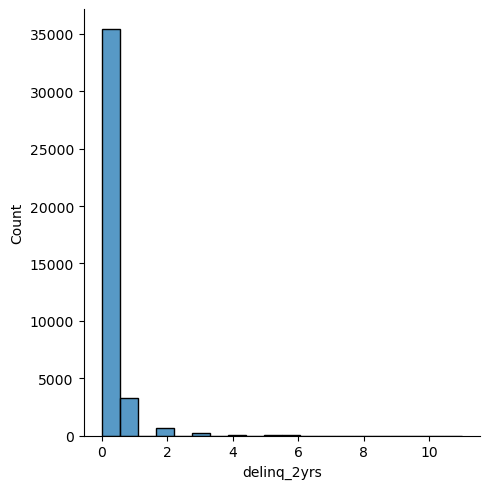

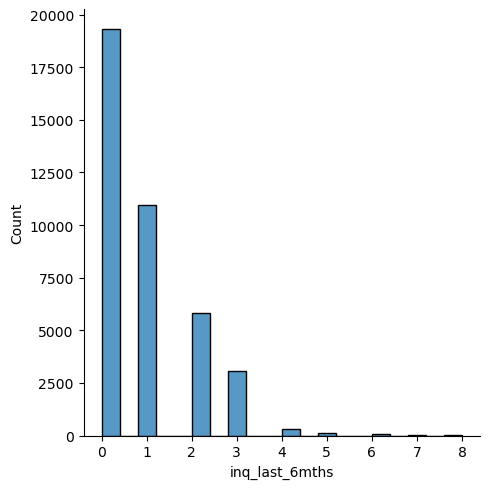

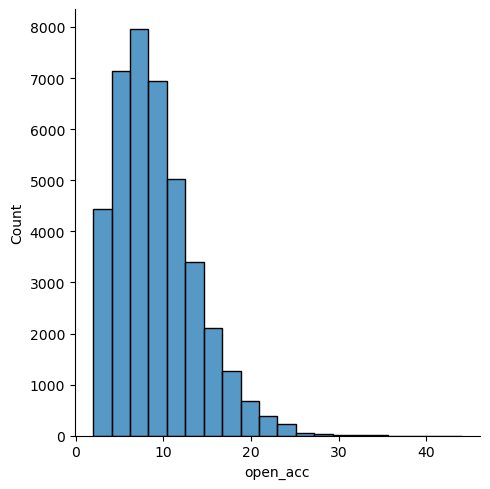

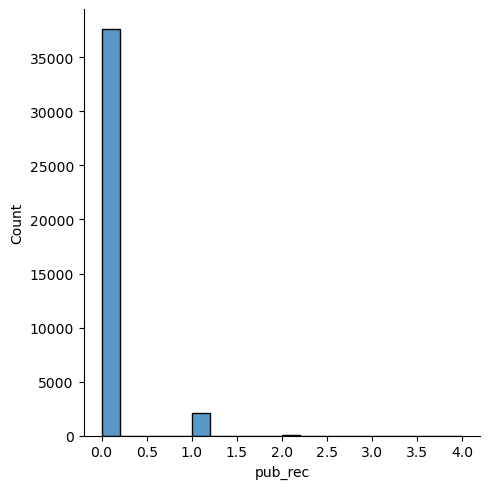

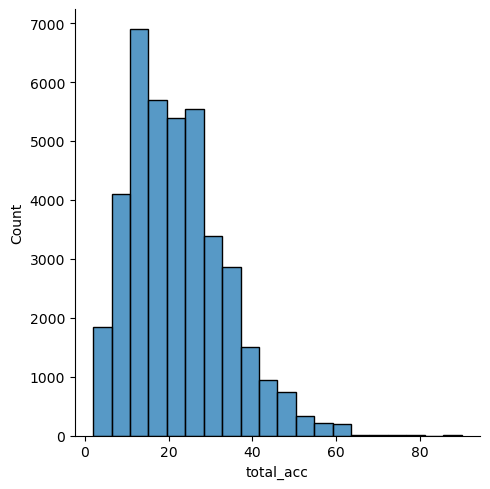

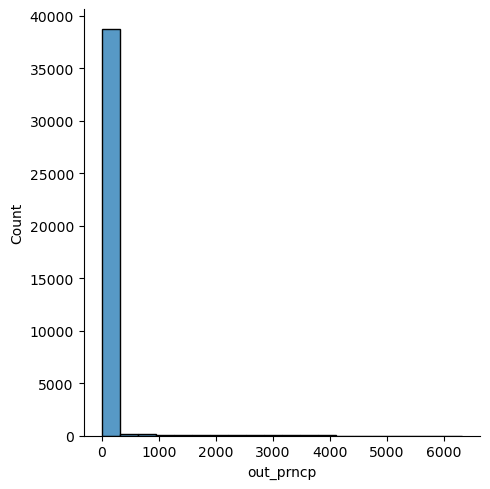

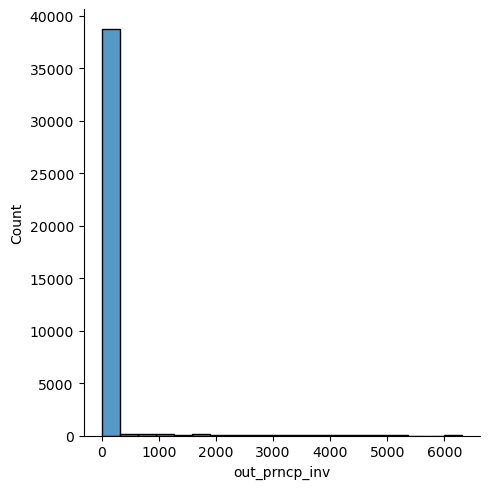

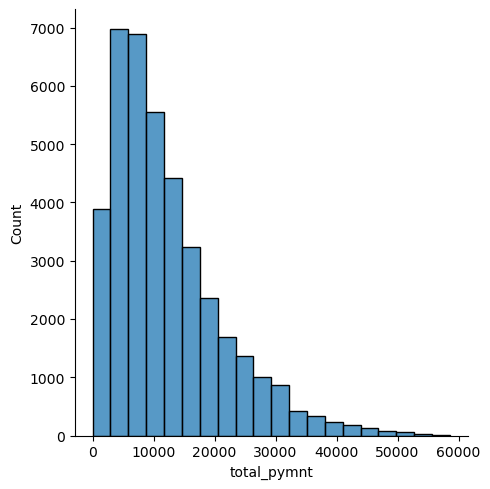

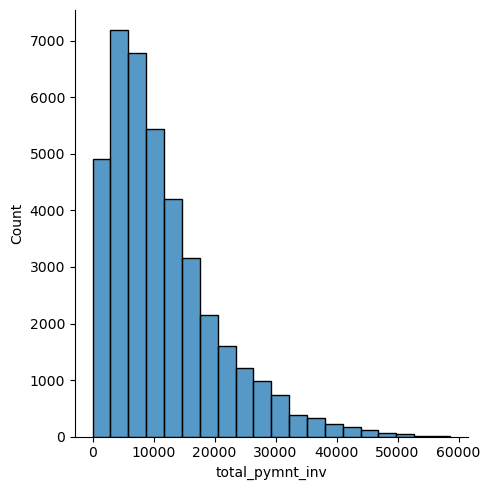

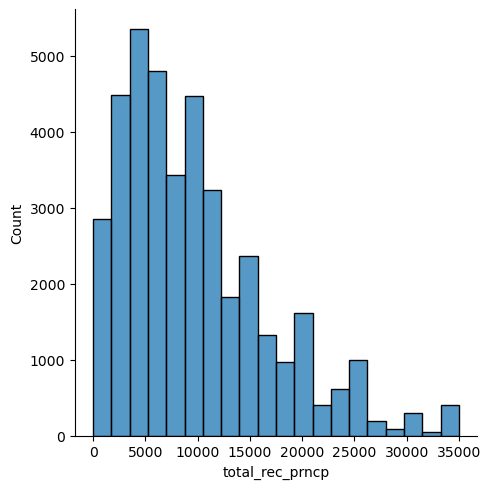

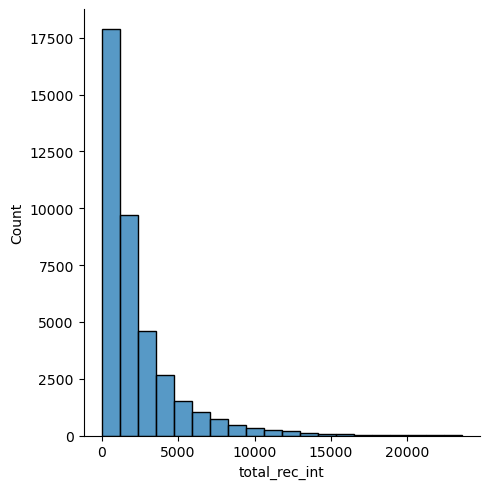

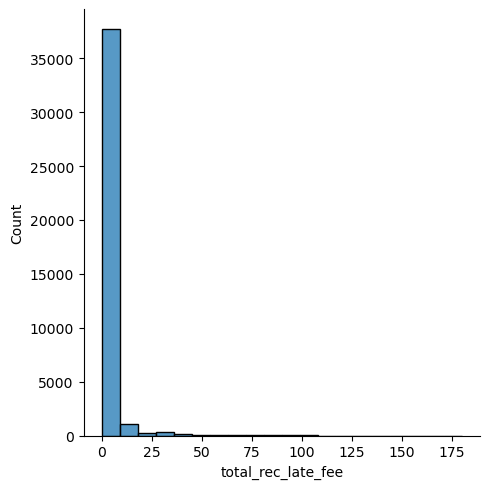

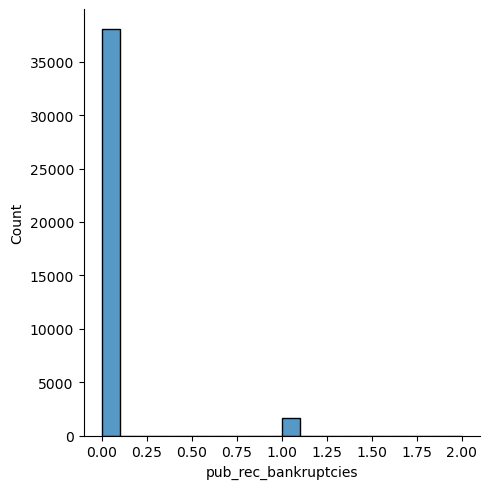

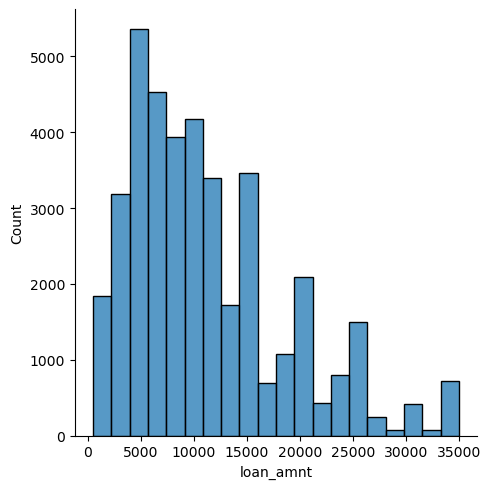

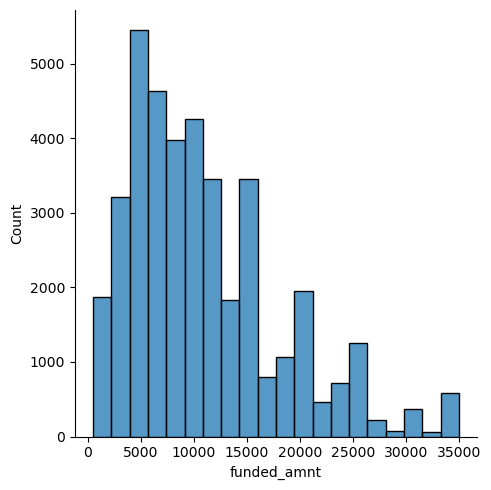

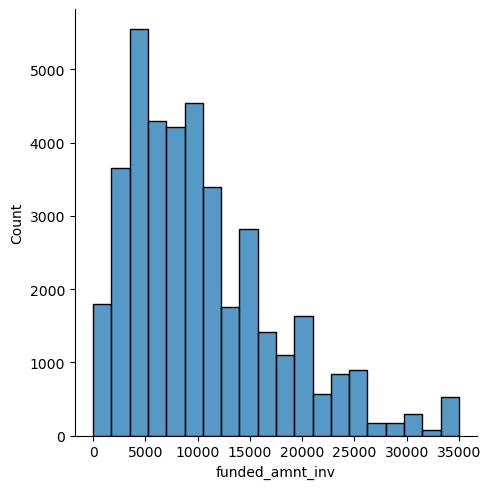

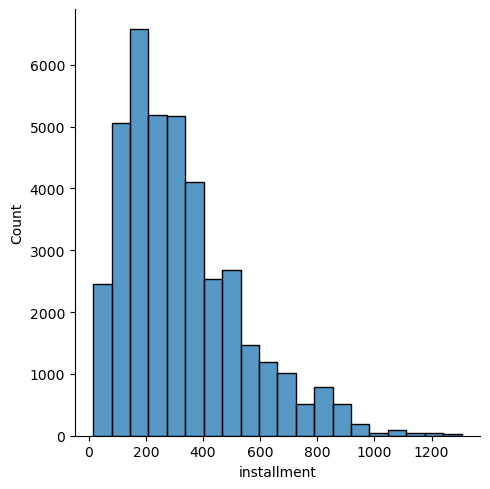

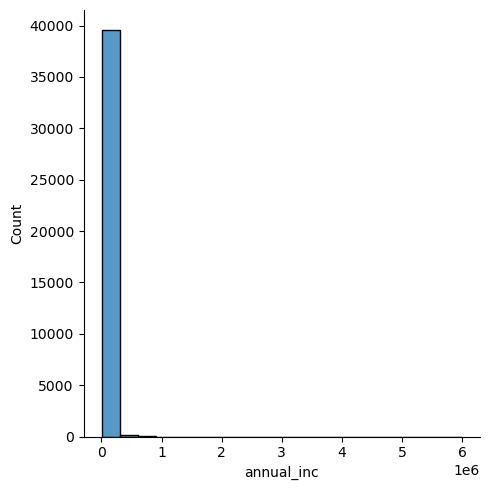

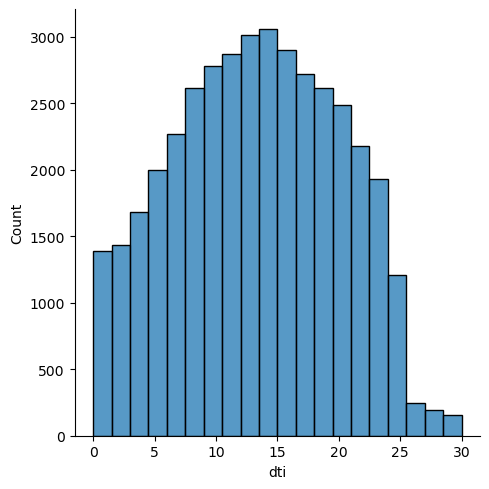

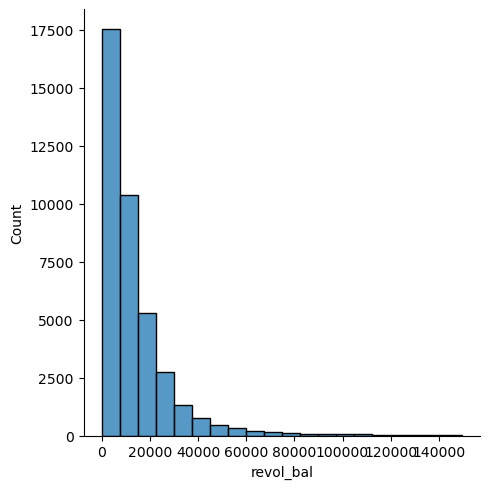

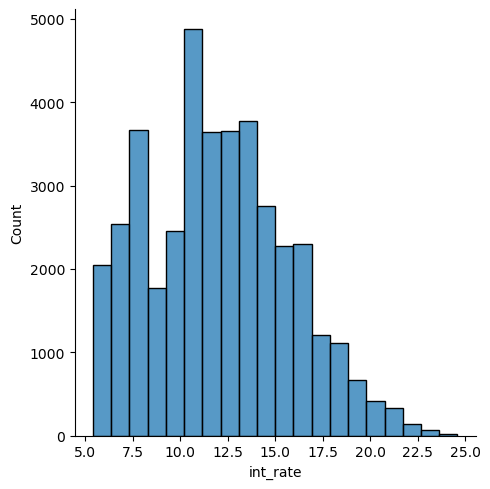

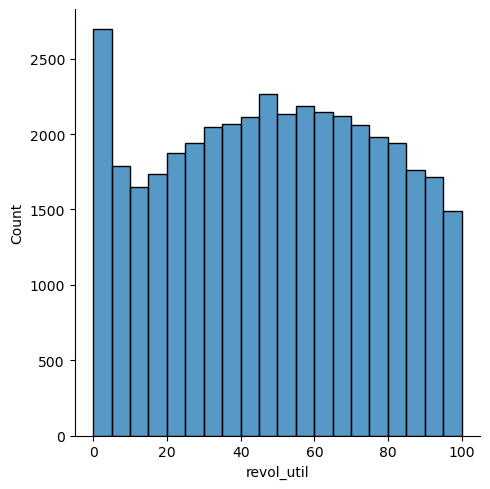

In [23]:
for i in num_cols:
    sns.displot(x=data3[i], bins = 20)
    plt.show()

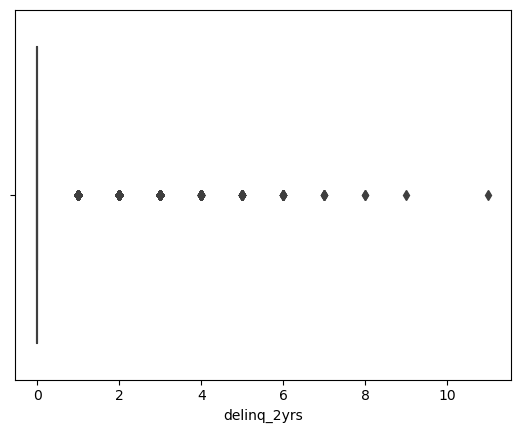

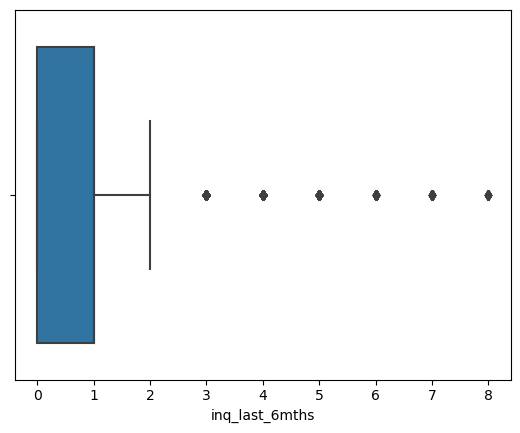

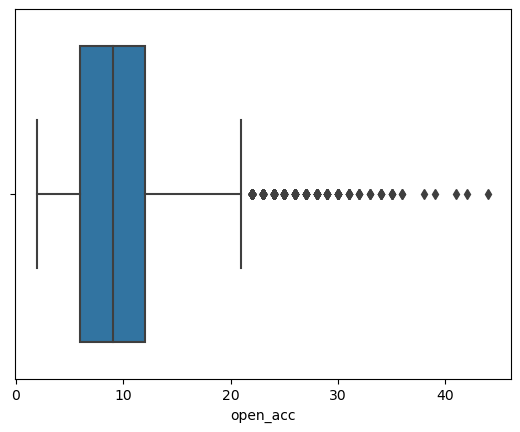

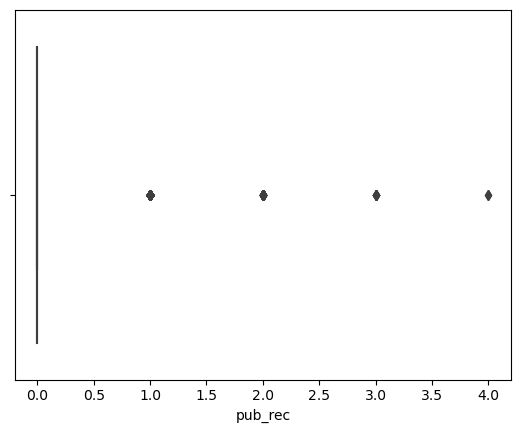

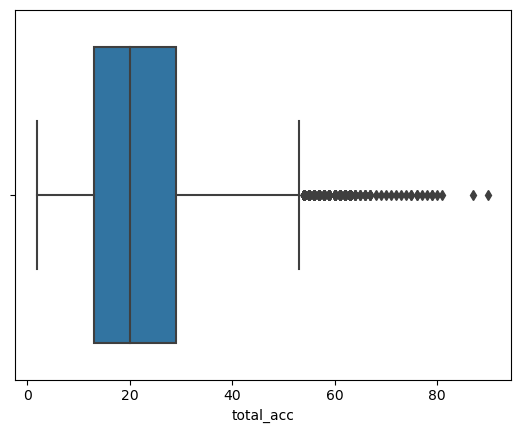

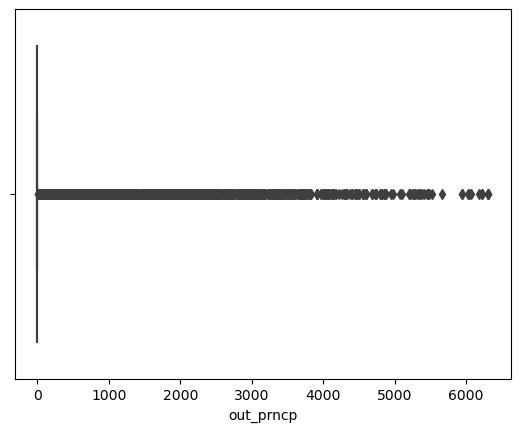

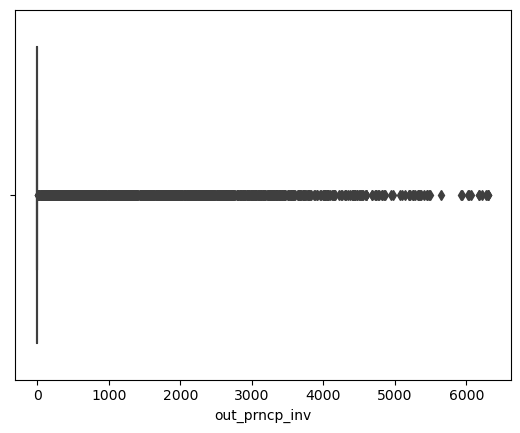

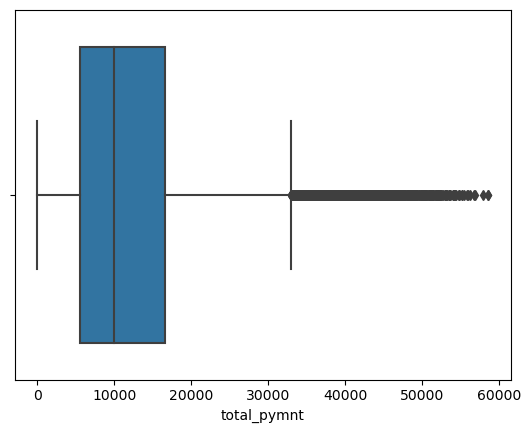

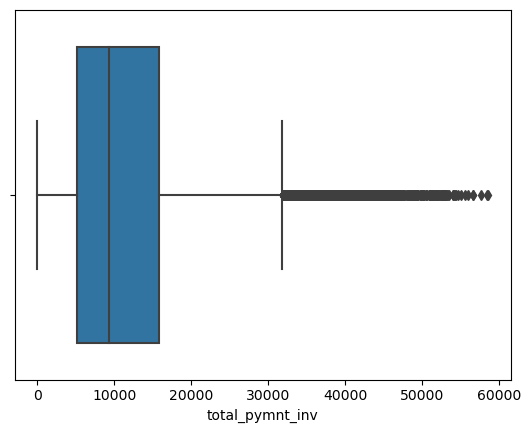

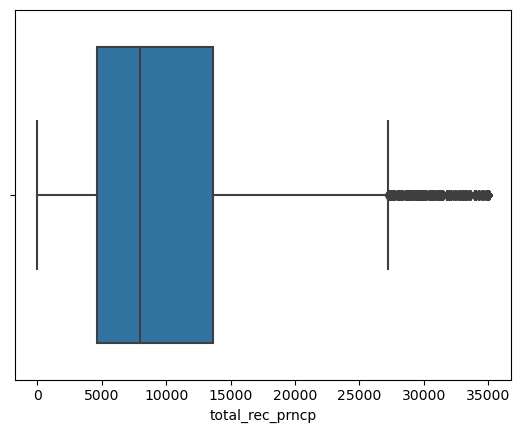

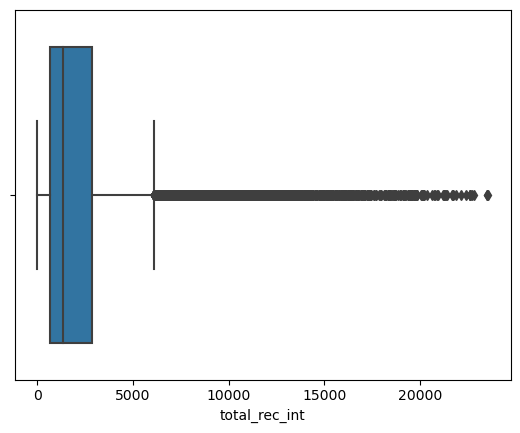

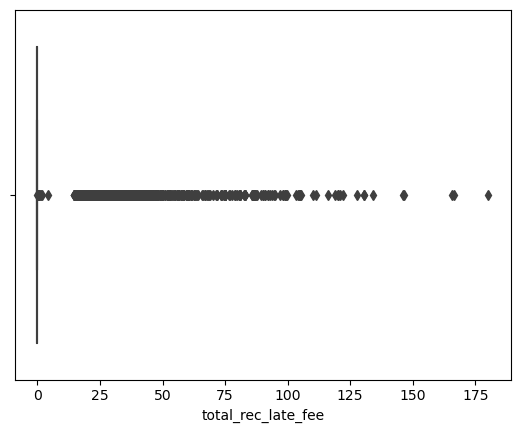

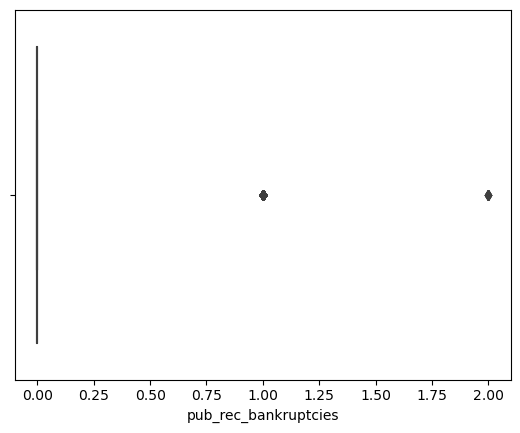

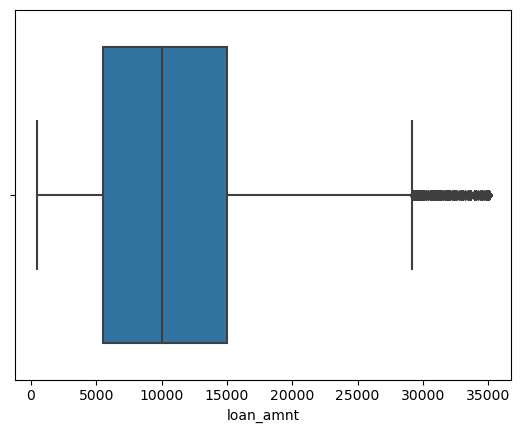

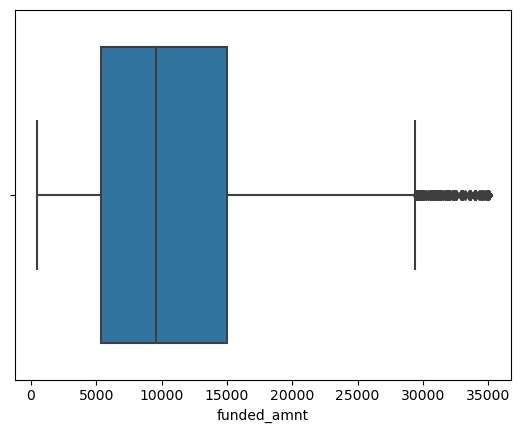

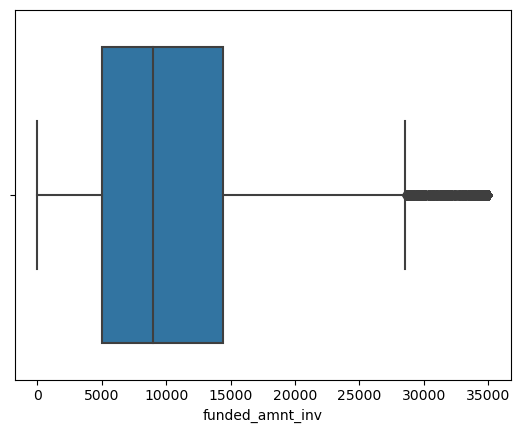

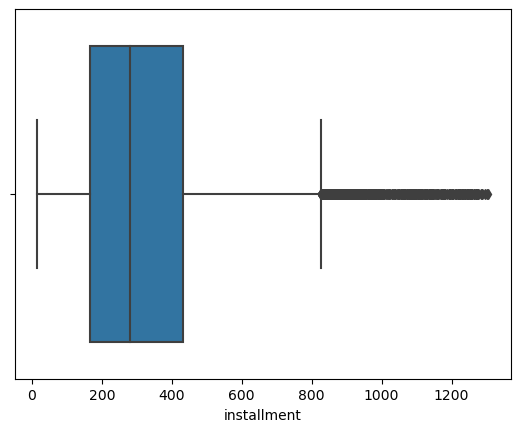

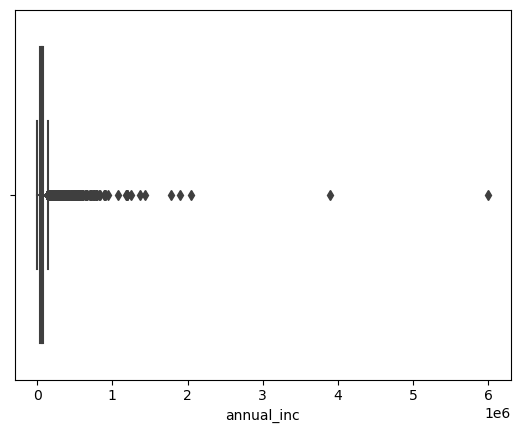

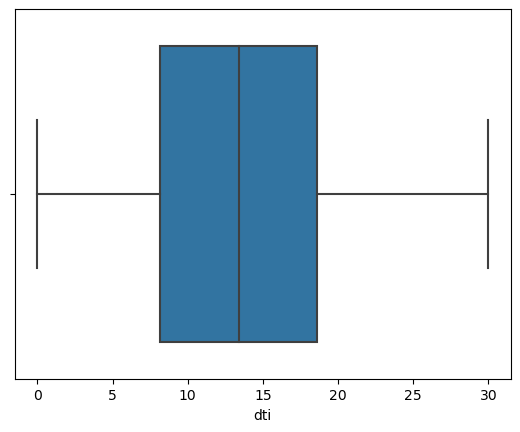

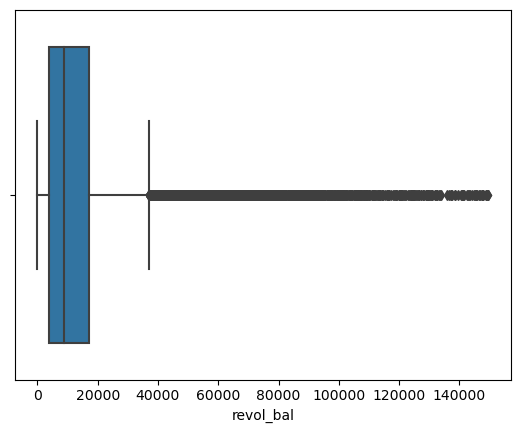

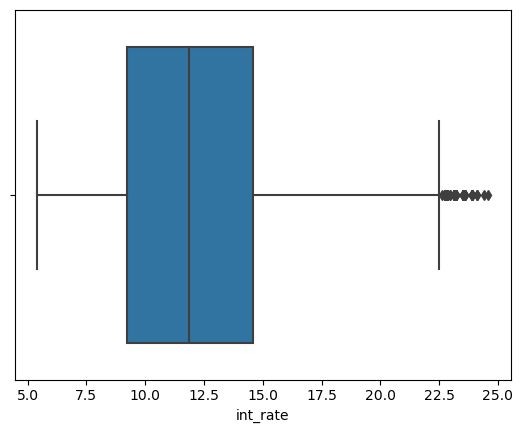

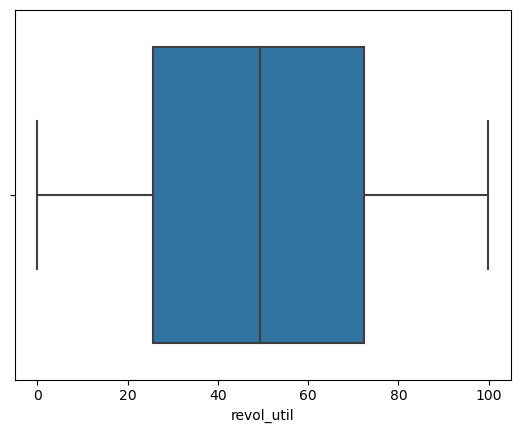

In [24]:
for i in num_cols:
    sns.boxplot(x=data3[i])
    plt.show()

### Categorical Columns

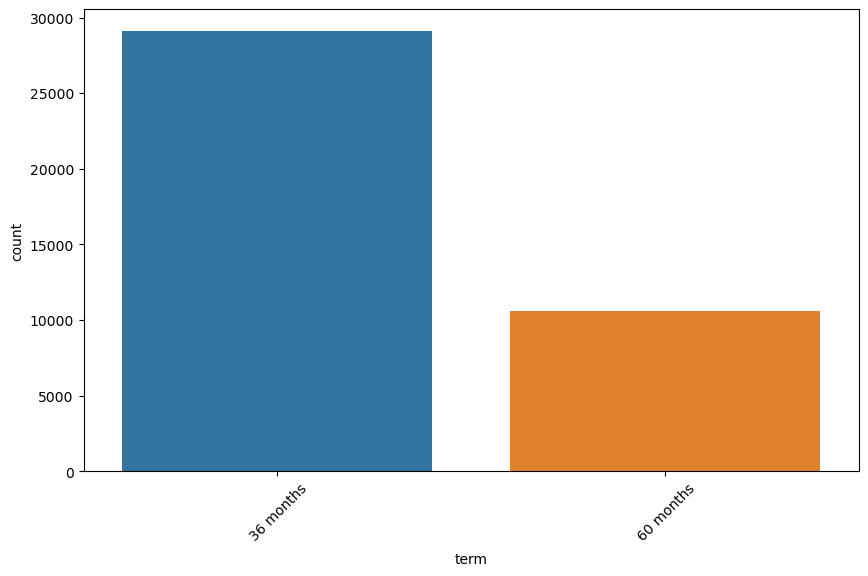

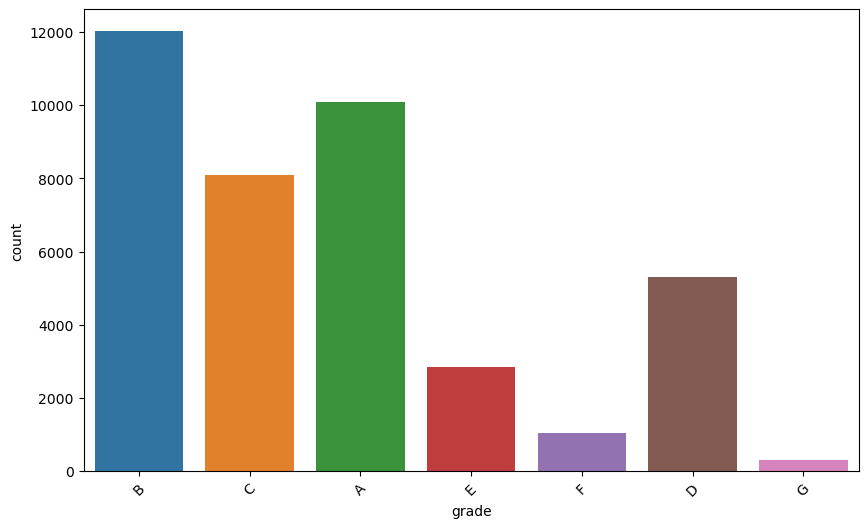

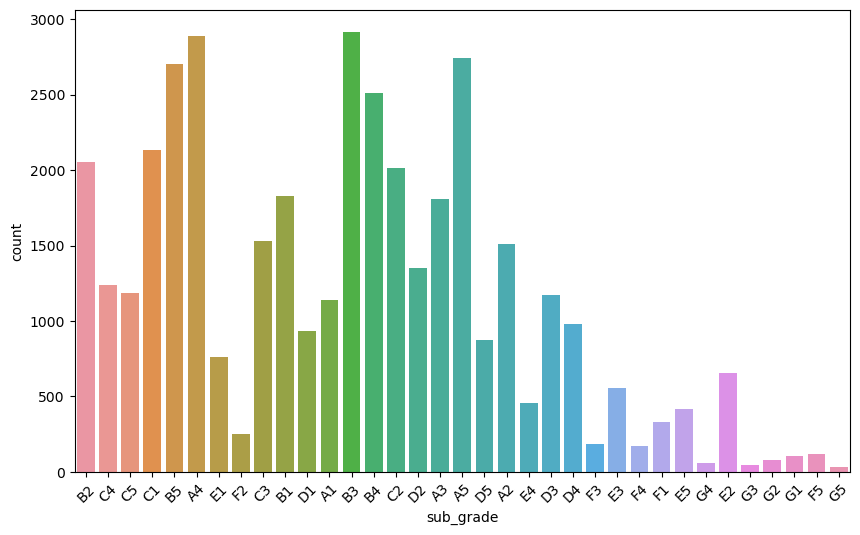

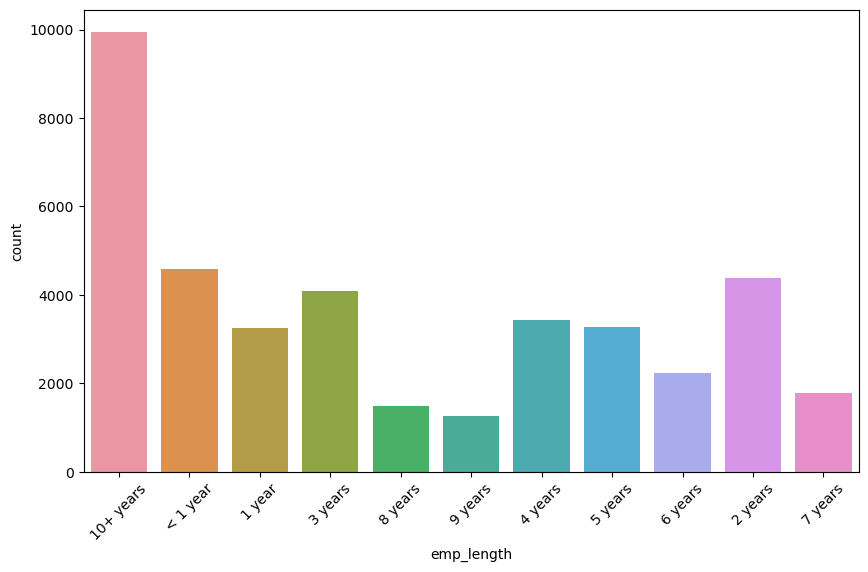

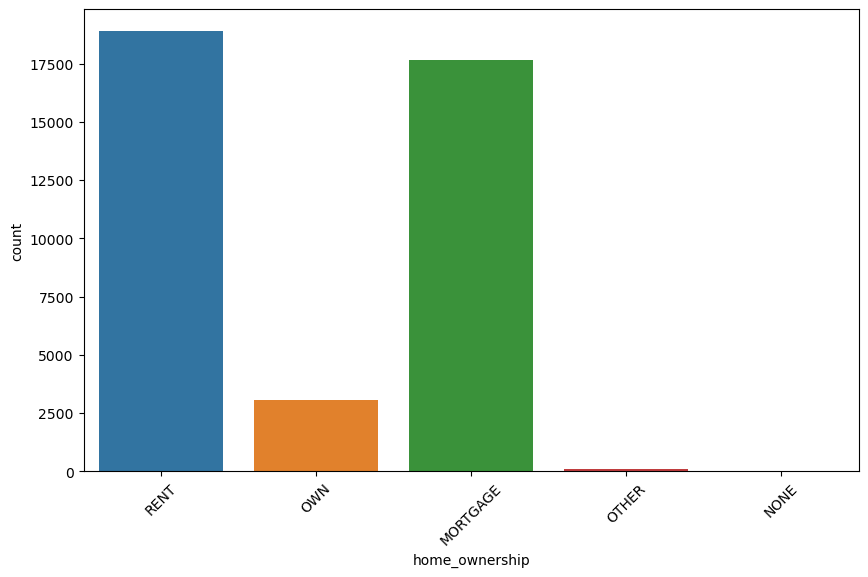

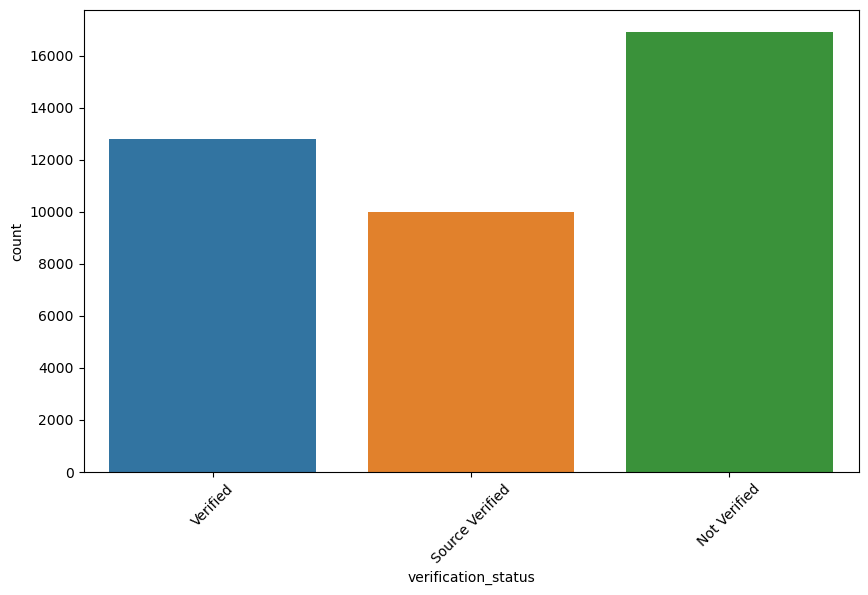

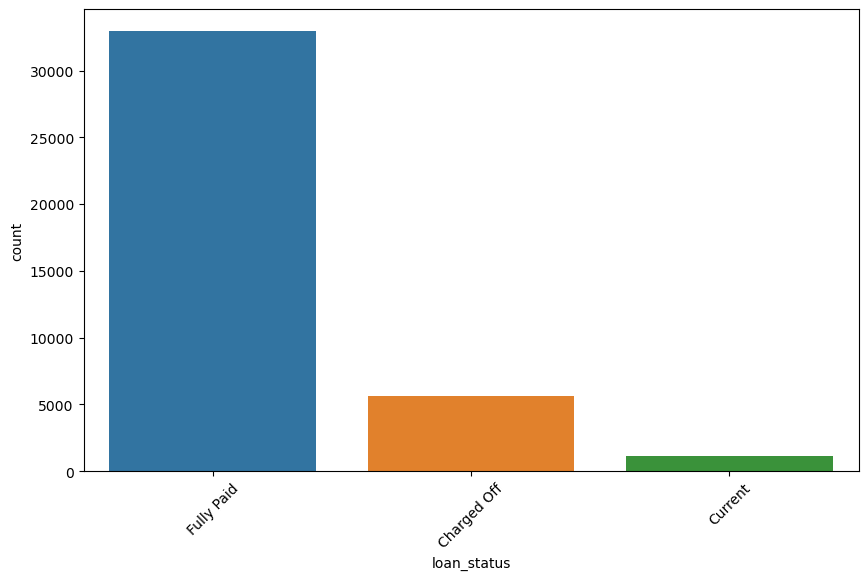

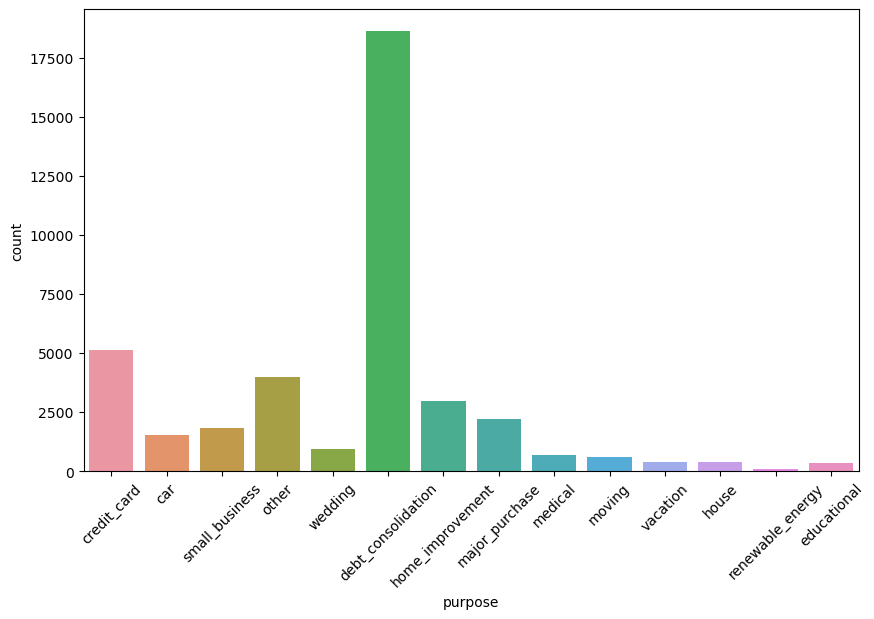

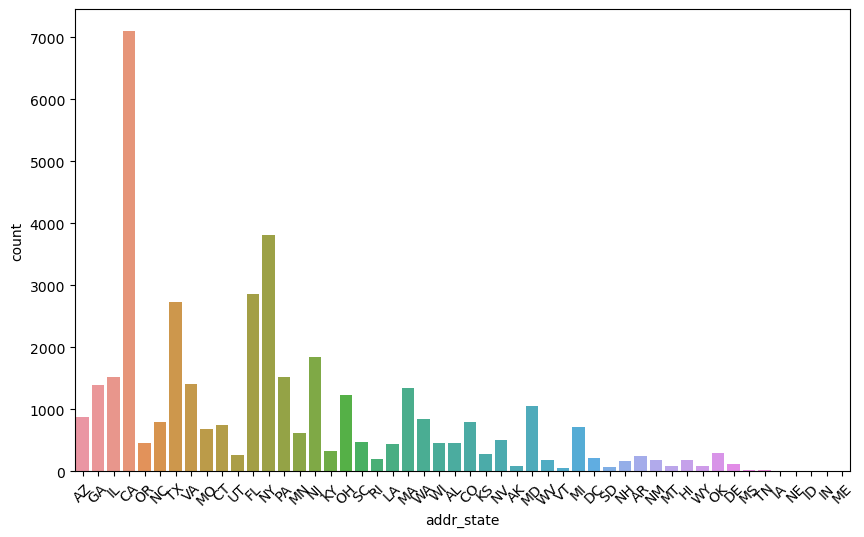

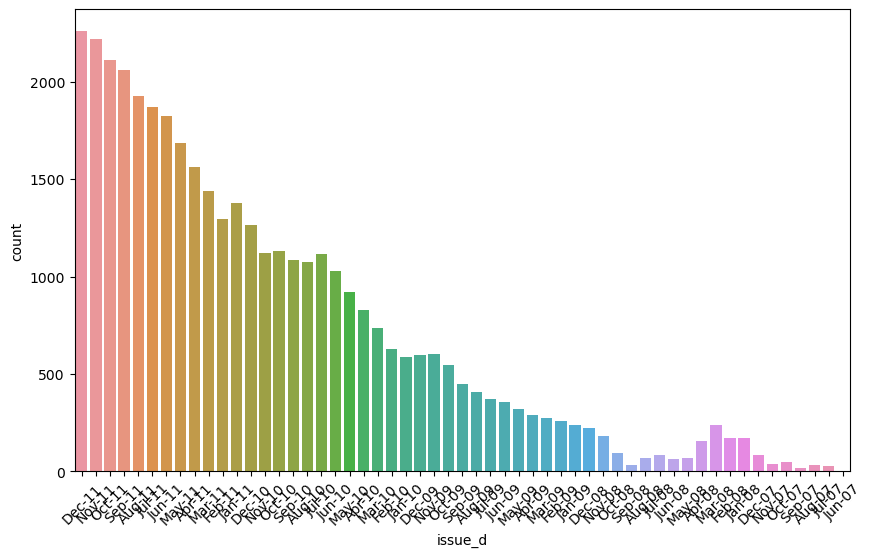

In [25]:

for i in cat_cols:
    plt.figure(figsize=(10, 6))
    plt.xticks(rotation=45)
    sns.countplot(x=data3[i])
    plt.show()

# Bivariate Analysis

In [26]:
#Creating a derived column to track the Loan default relationship across numerical columns
data3['charged-off']= data3['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [27]:
#Confirming the above operation
data3[['loan_status','charged-off']].head(20)

,loan_status,charged-off
0,Fully Paid,0
1,Charged Off,1
2,Fully Paid,0
3,Fully Paid,0
4,Current,0
5,Fully Paid,0
6,Fully Paid,0
7,Fully Paid,0
8,Charged Off,1
9,Charged Off,1


### Numerical Columns

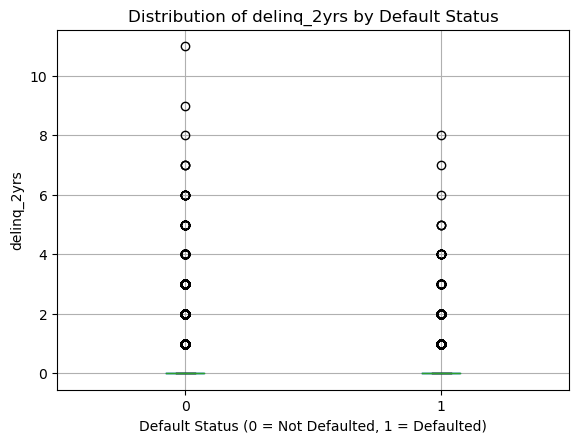

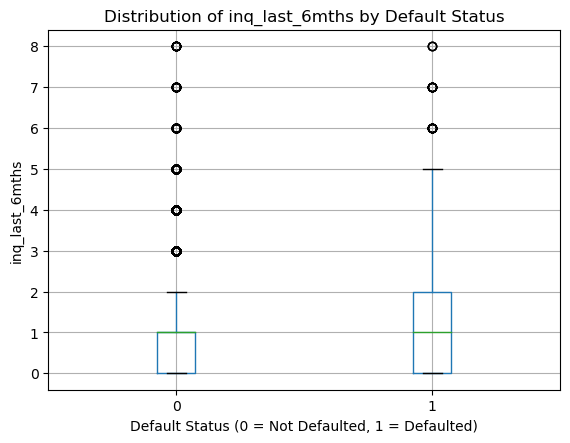

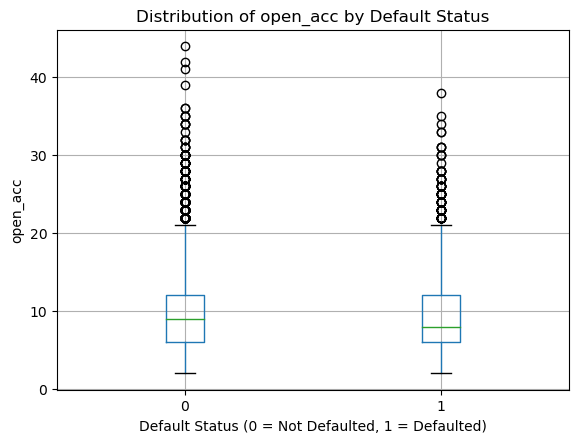

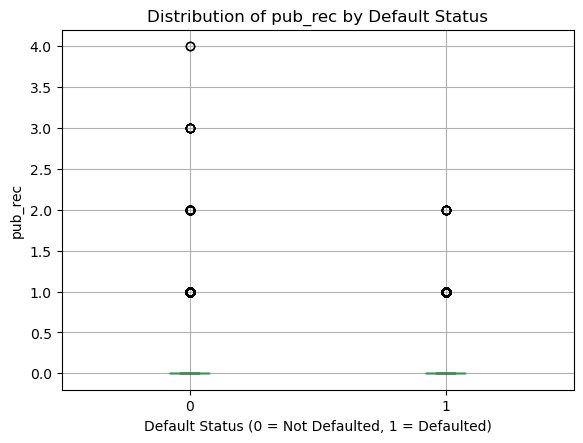

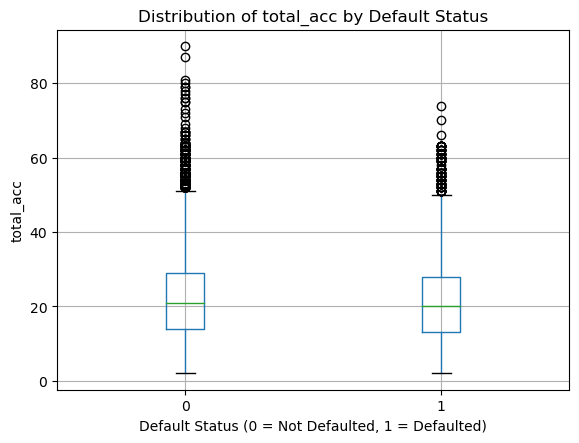

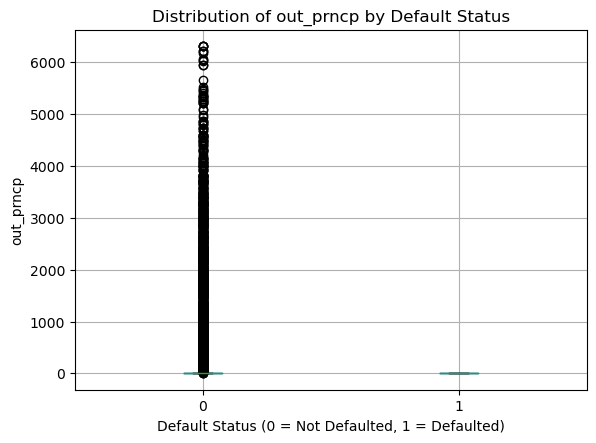

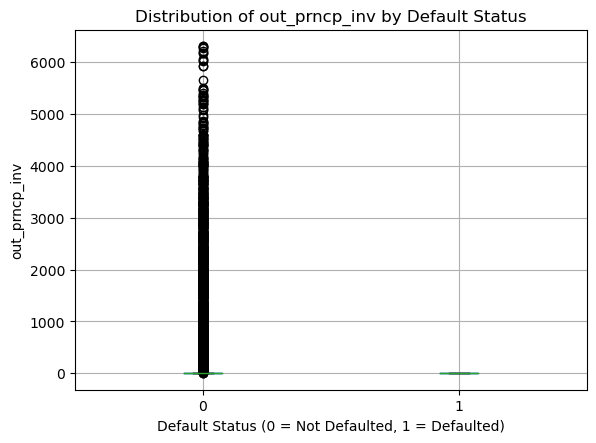

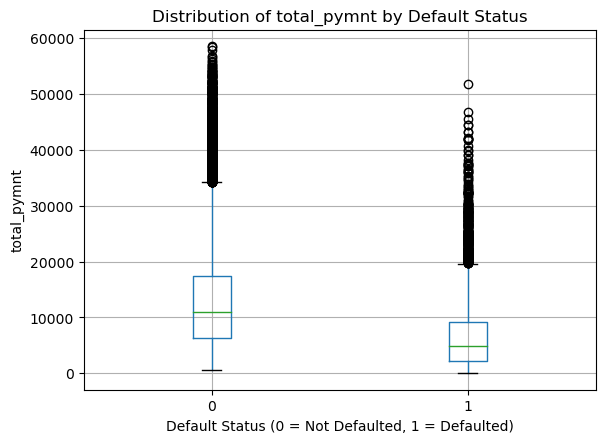

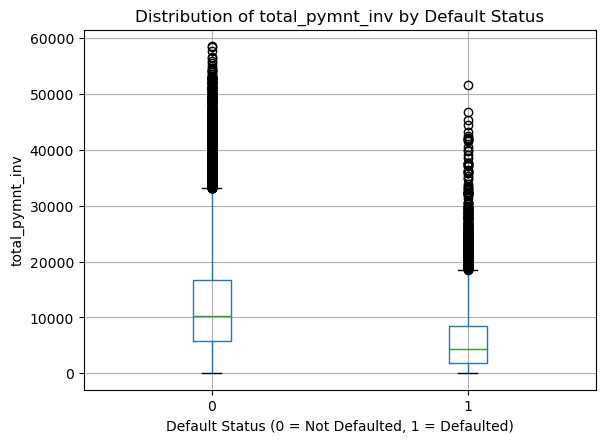

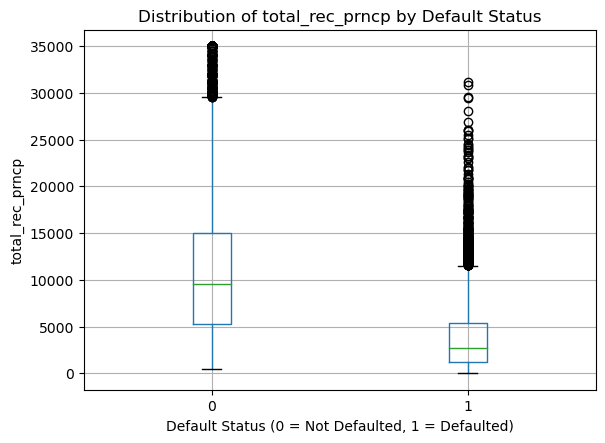

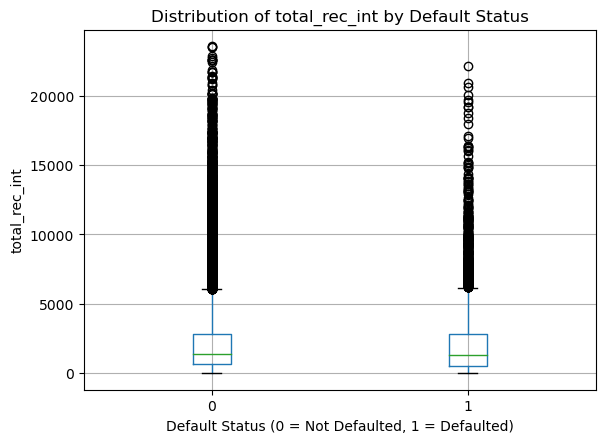

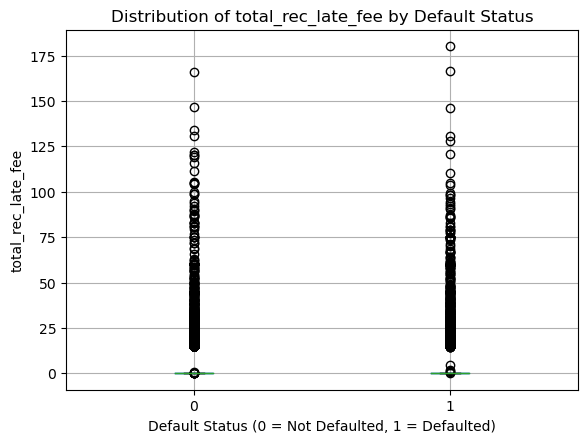

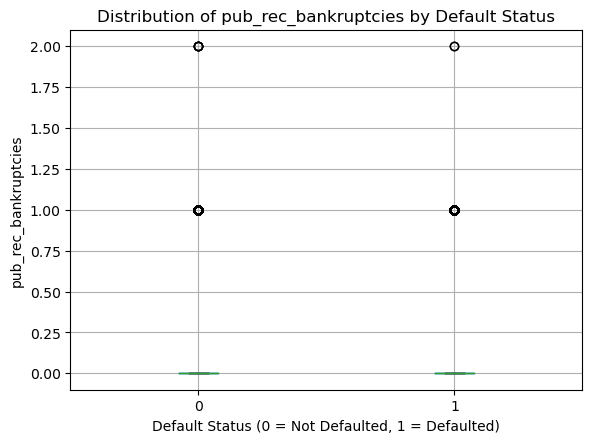

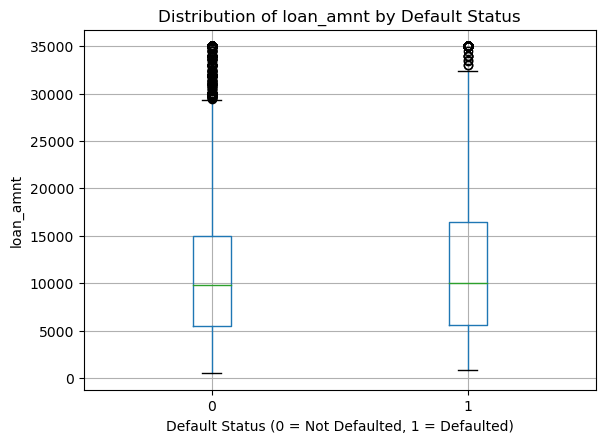

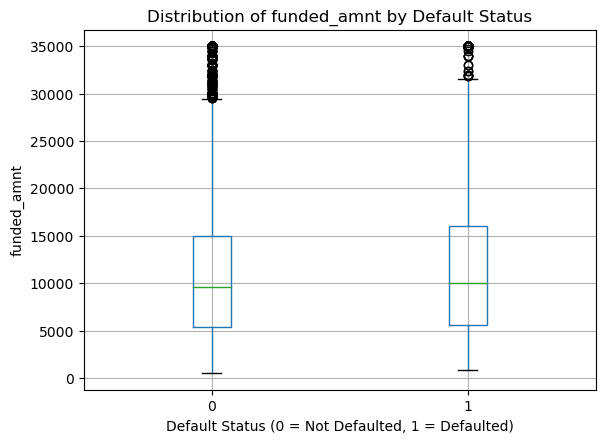

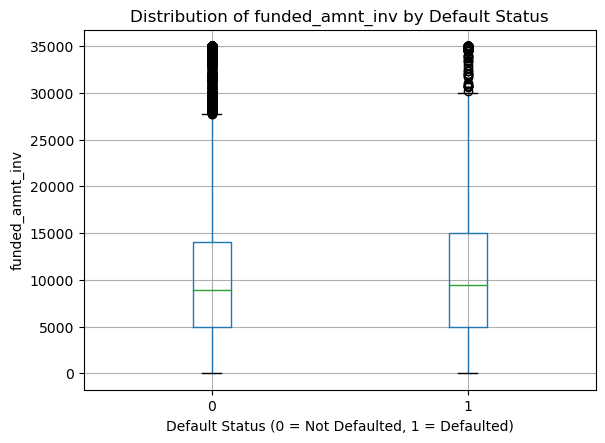

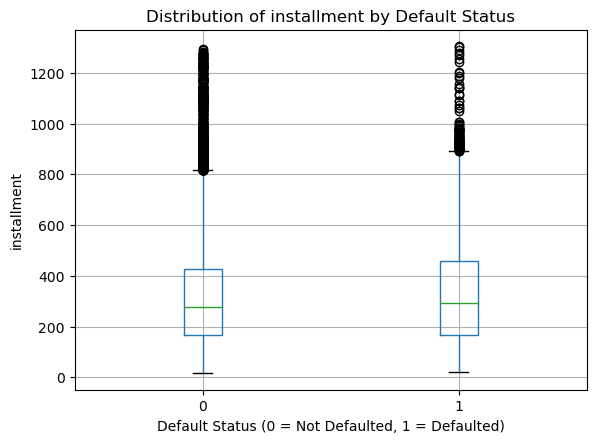

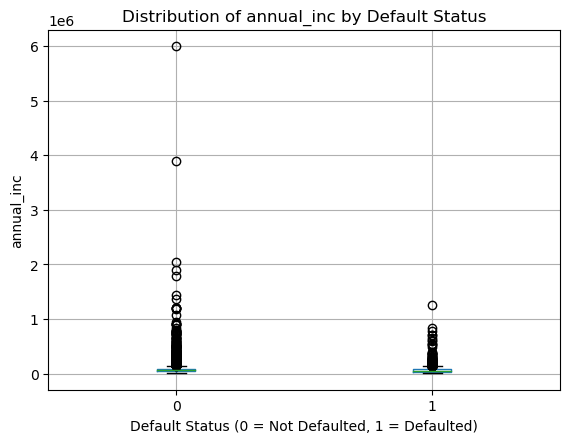

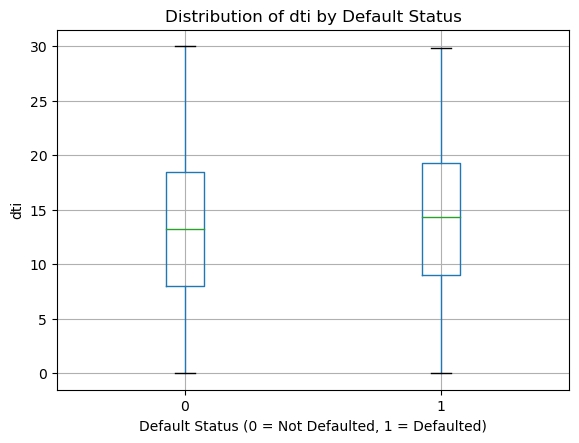

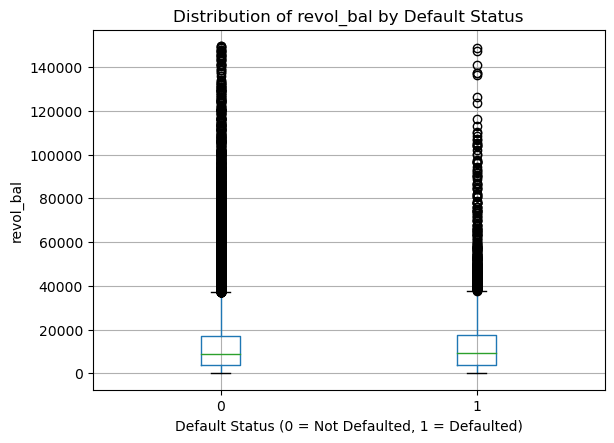

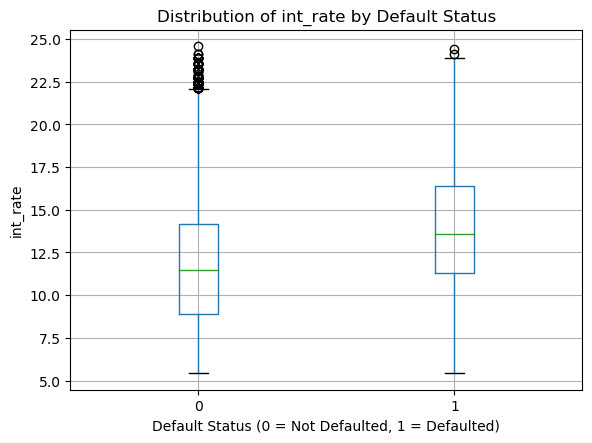

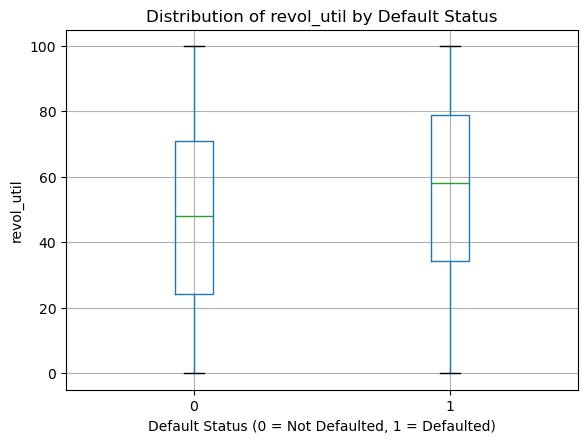

In [28]:
#Boxplot for Numerical Columns
for i in num_cols:
    data3.boxplot(column=i, by='charged-off')
    plt.title(f'Distribution of {i} by Default Status')  # Set a title for clarity
    plt.xlabel('Default Status (0 = Not Defaulted, 1 = Defaulted)')
    plt.ylabel(i)
    plt.suptitle('')
    plt.show()

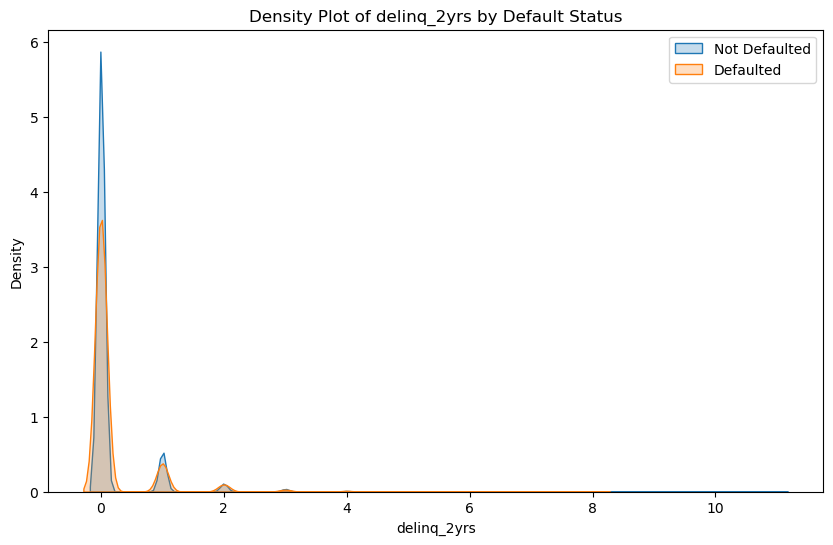

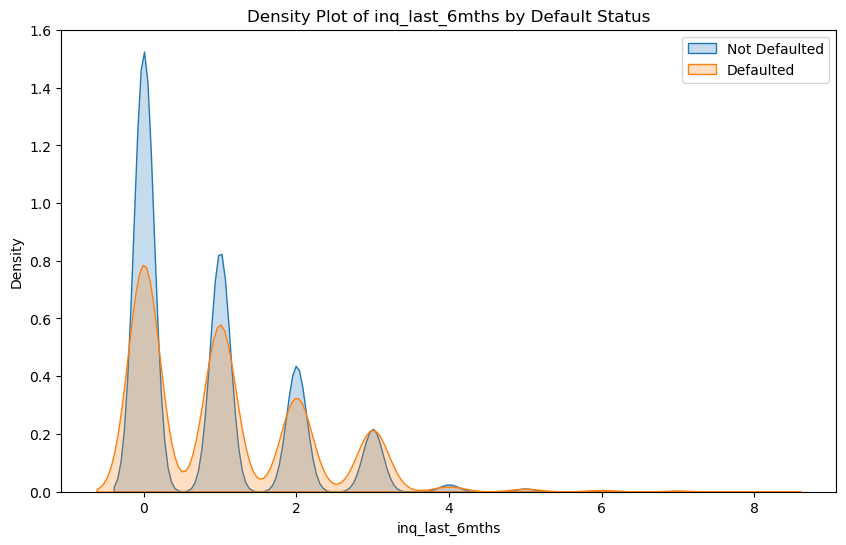

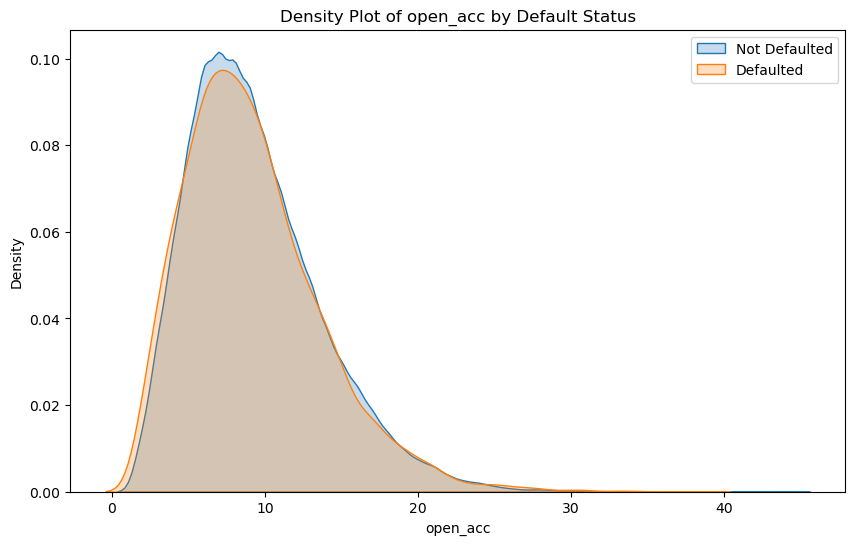

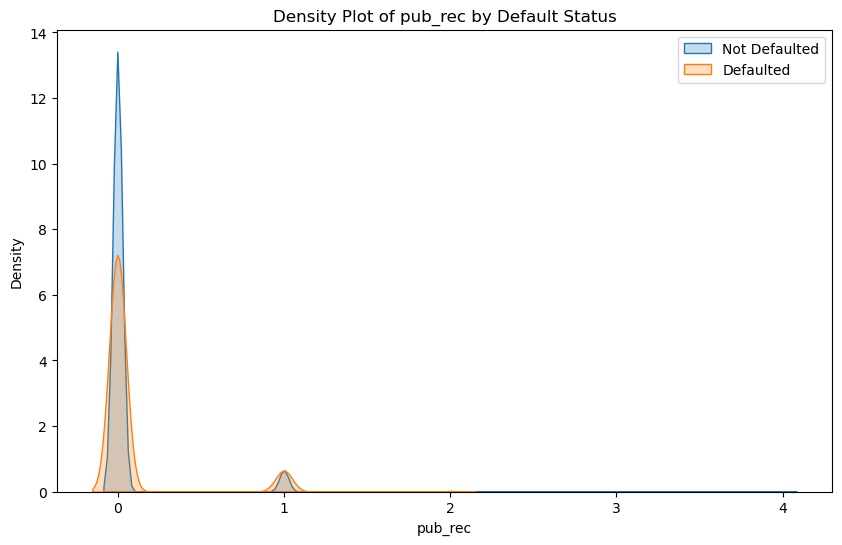

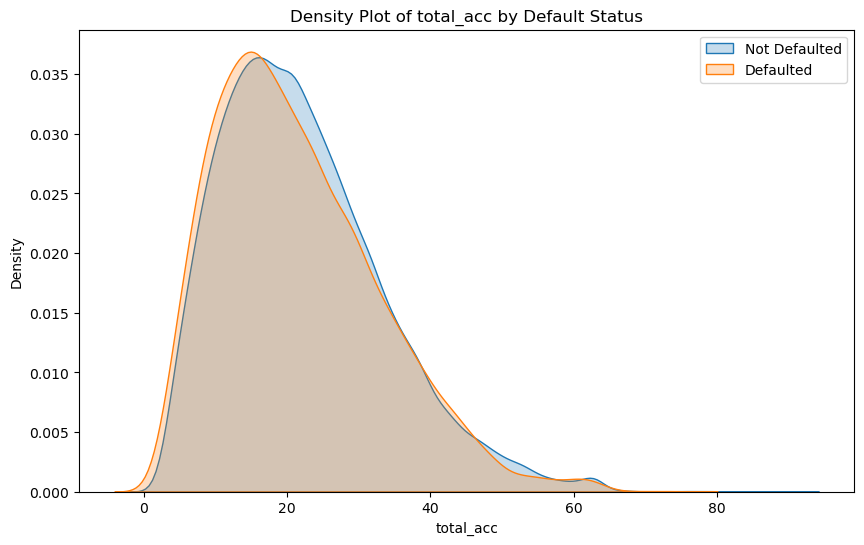

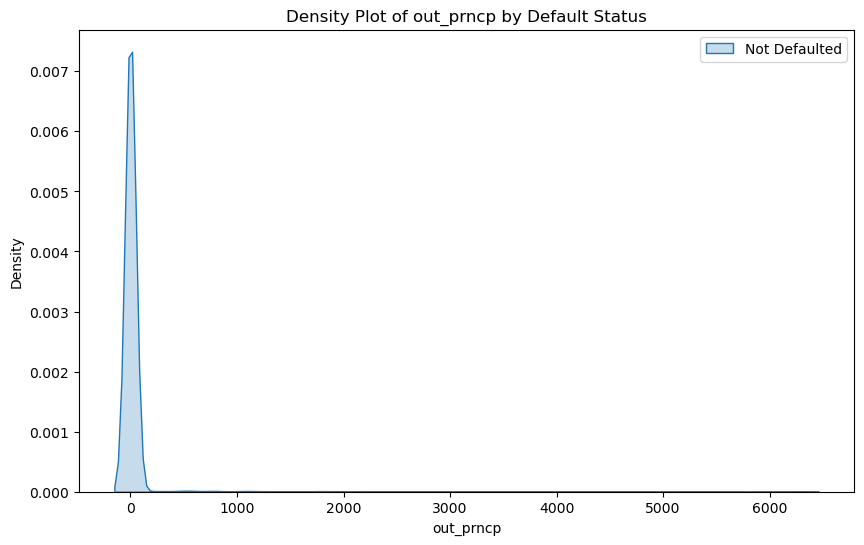

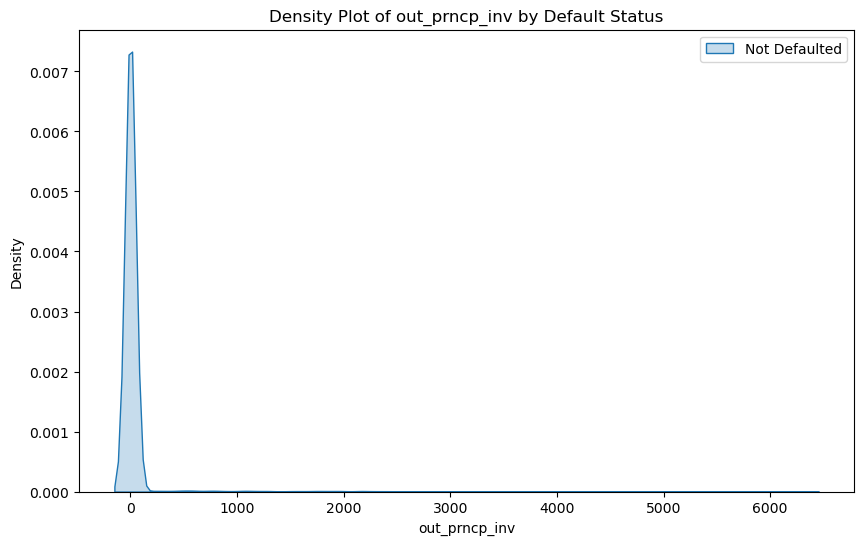

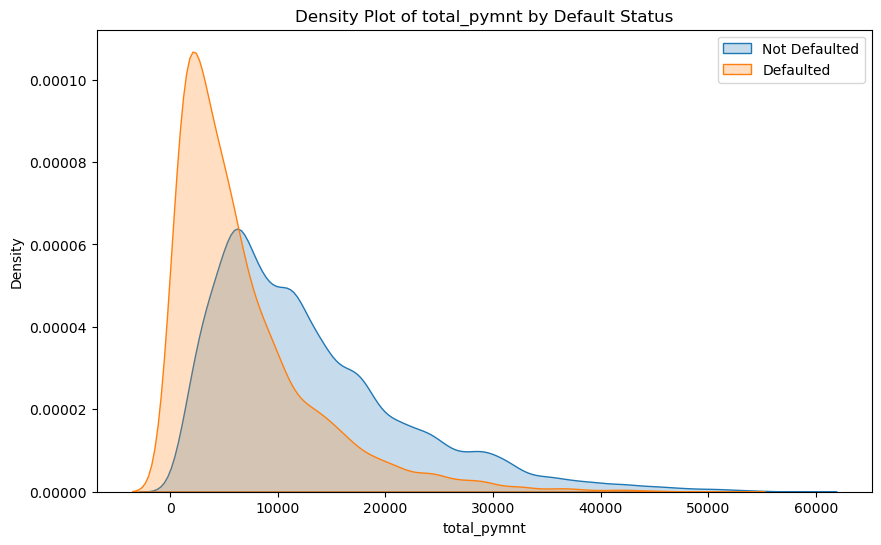

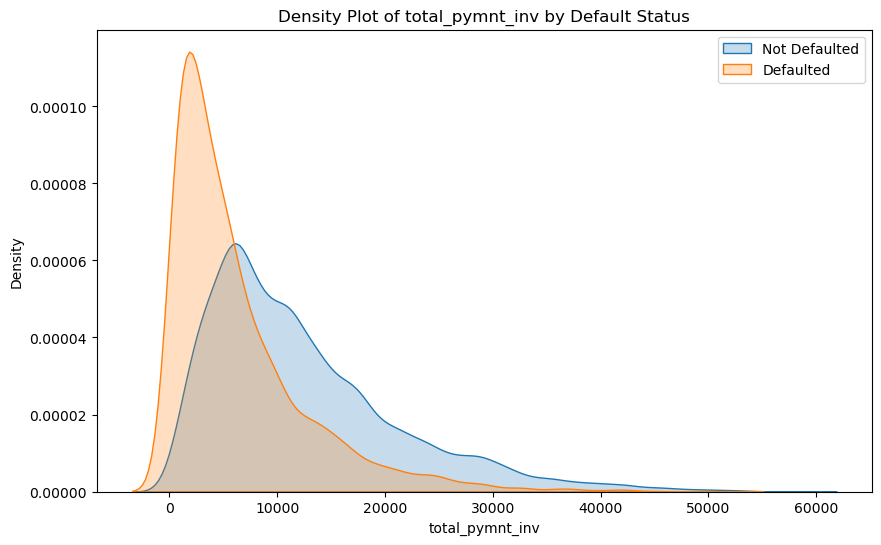

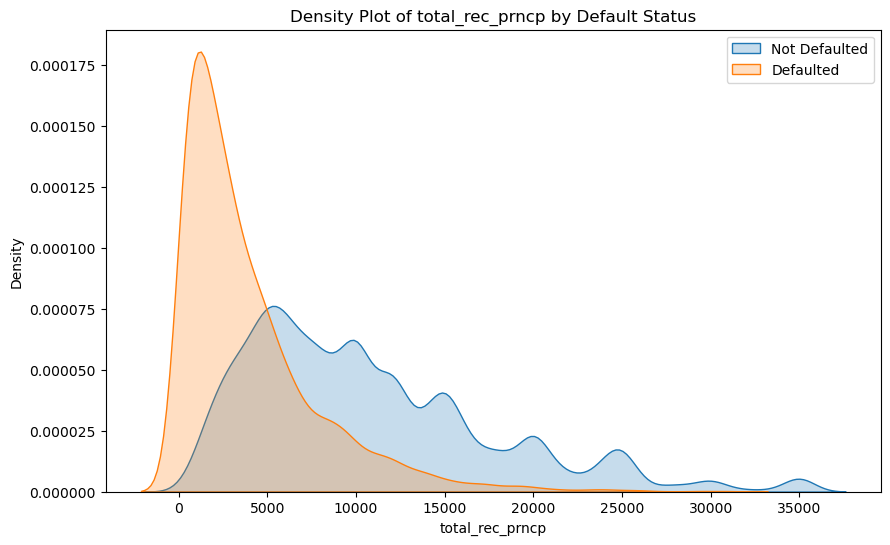

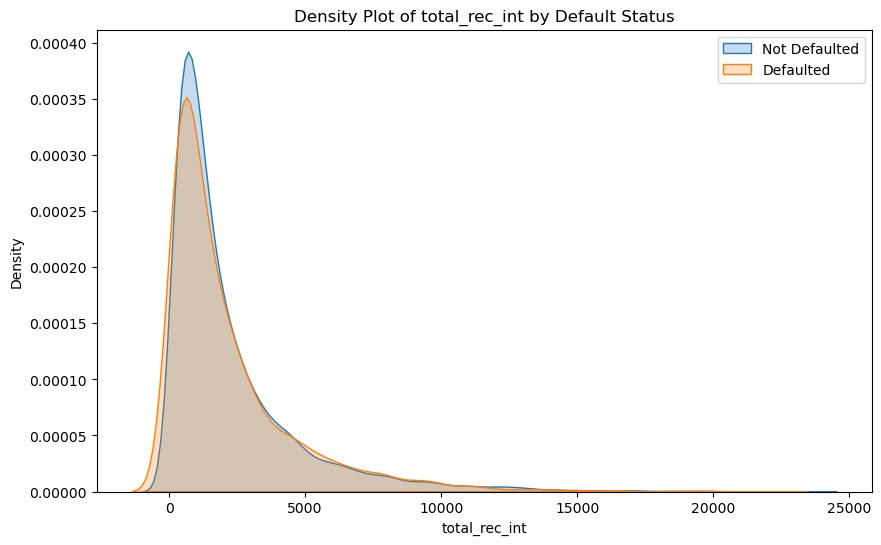

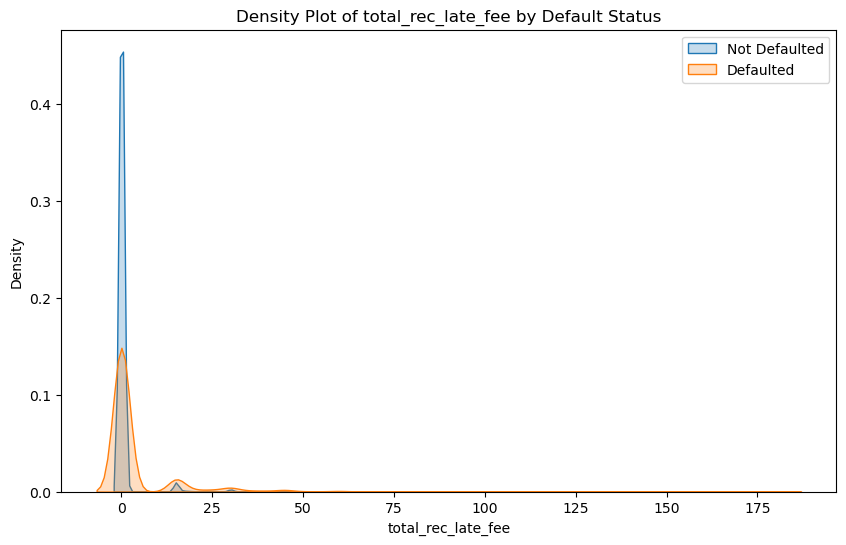

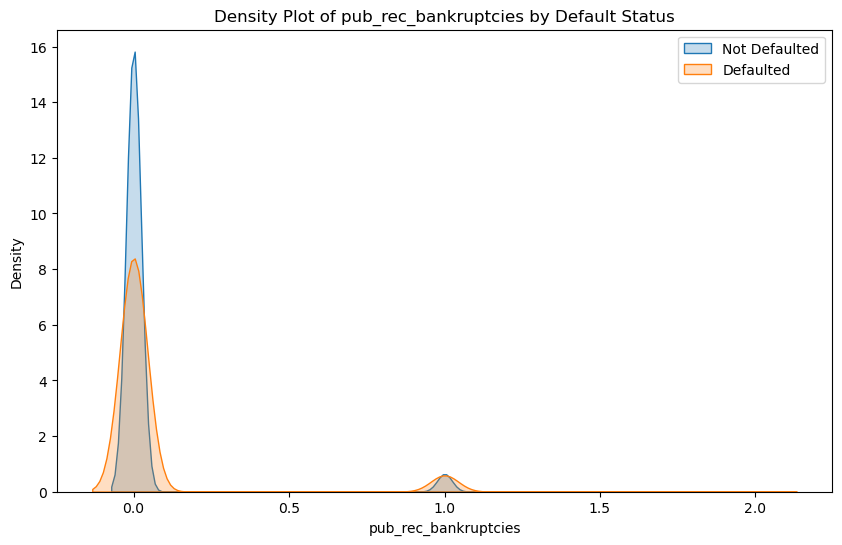

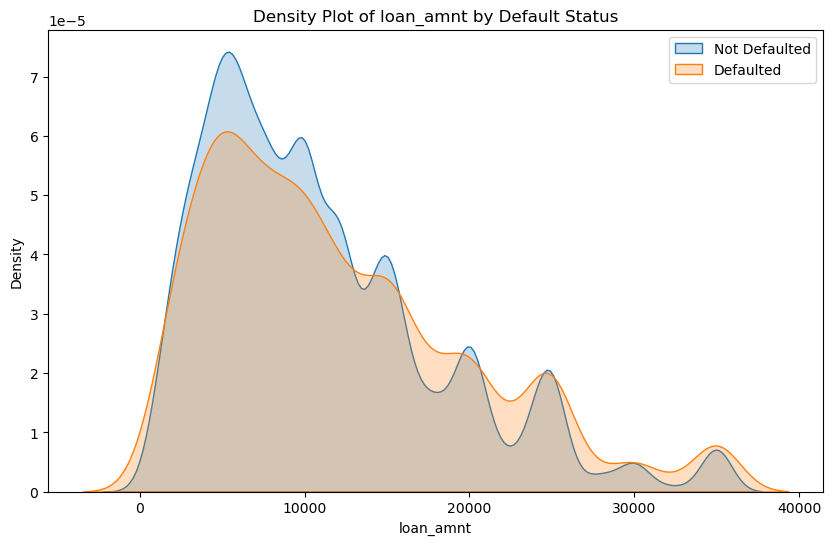

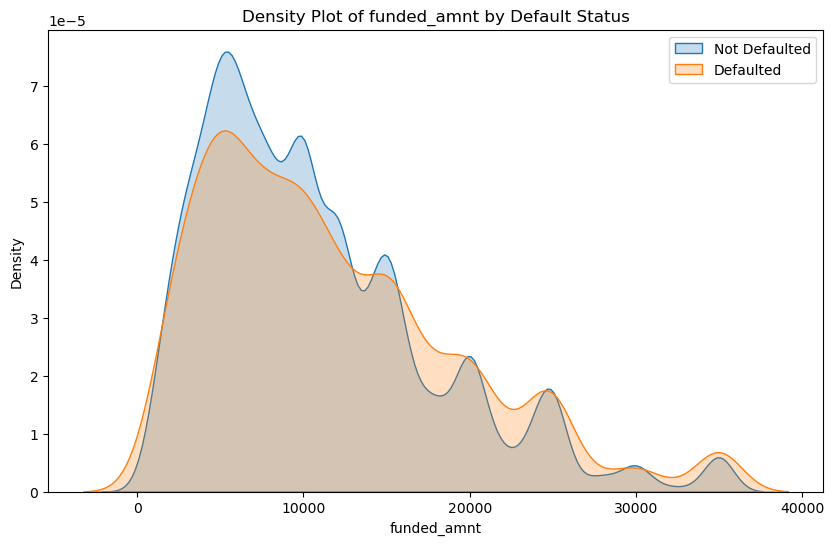

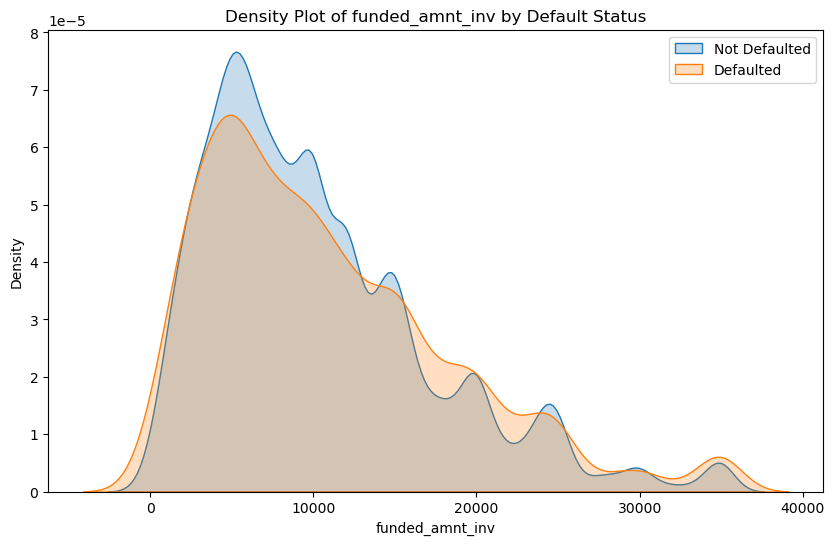

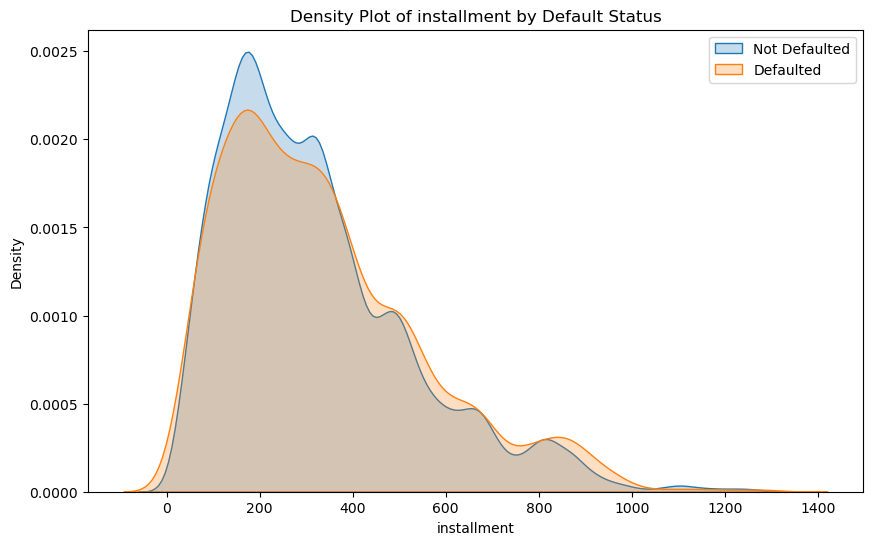

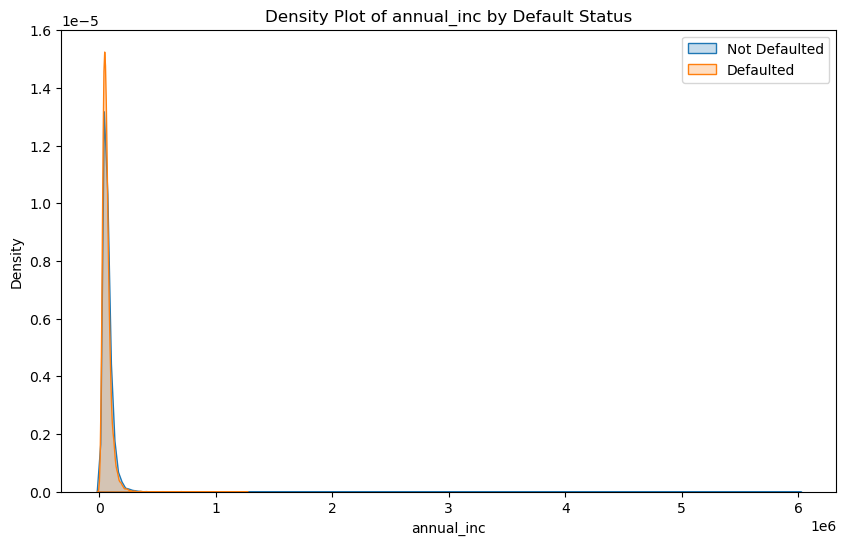

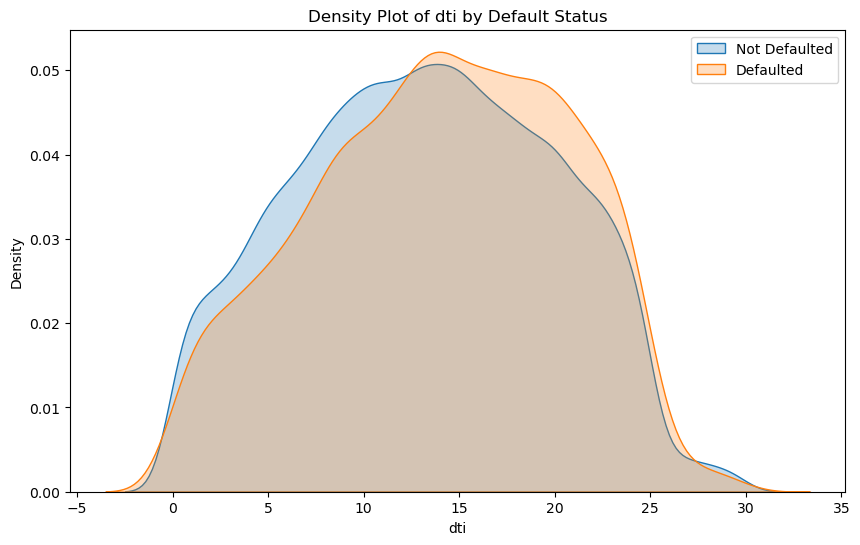

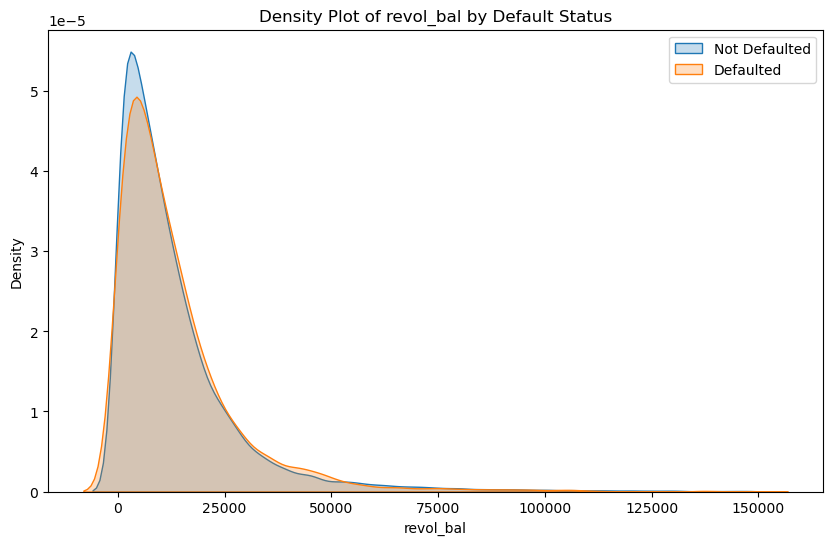

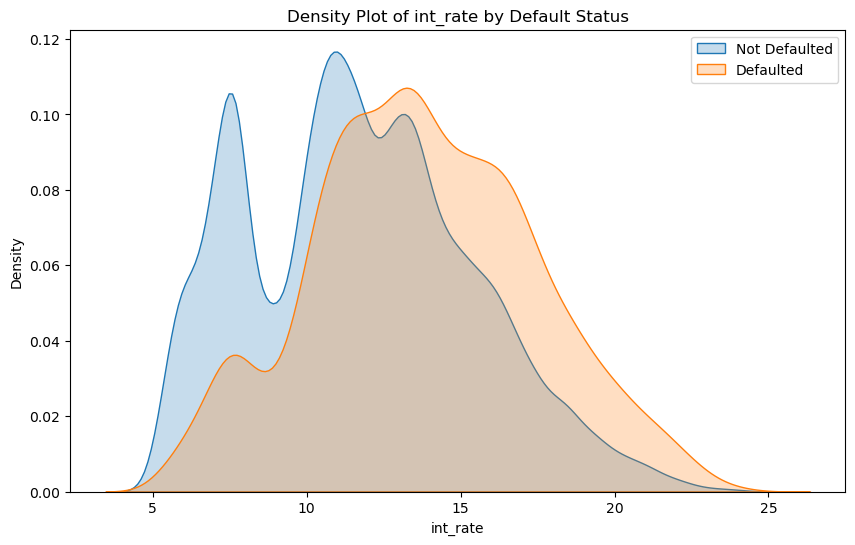

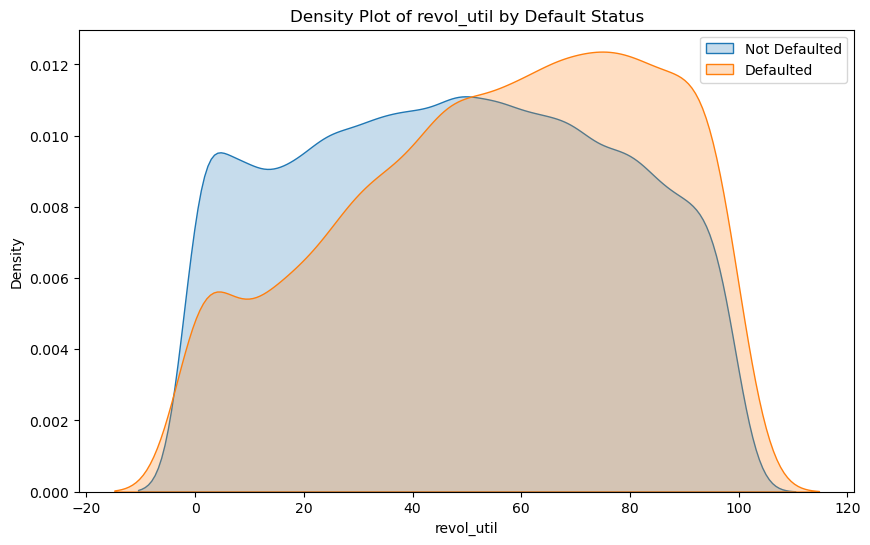

In [29]:
#Plotting the density for Numerical columns to know the weighted proportion for each category
for i in num_cols:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data3[data3['charged-off'] == 0][i], label='Not Defaulted', shade=True)
    sns.kdeplot(data3[data3['charged-off'] == 1][i], label='Defaulted', shade=True)
    plt.title(f'Density Plot of {i} by Default Status')
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


### Categorical Columns

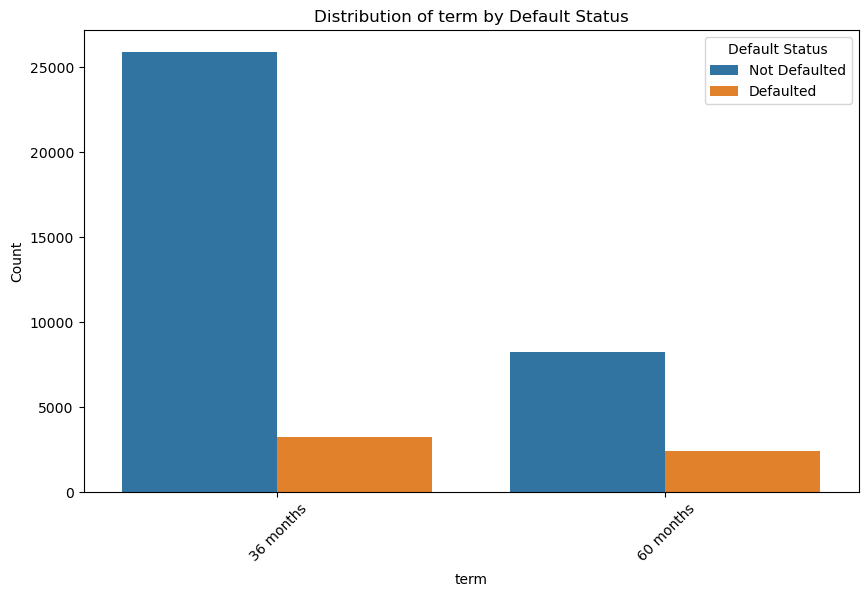

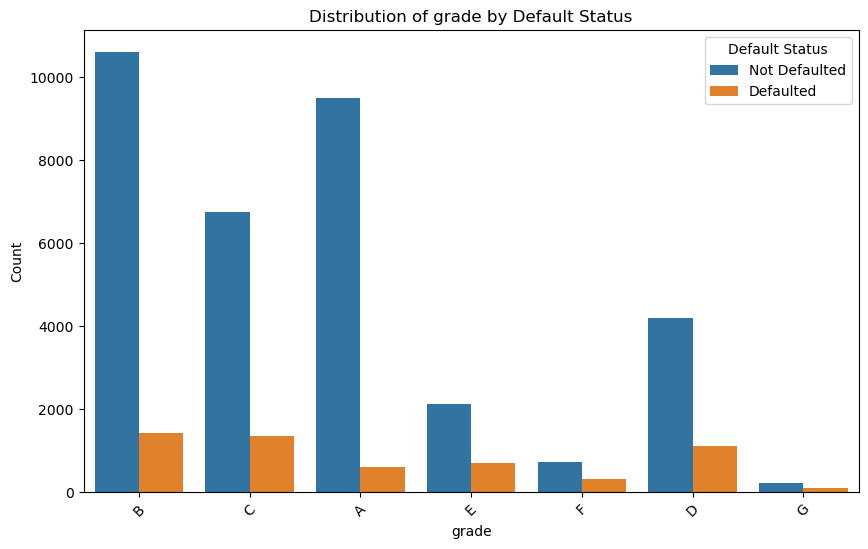

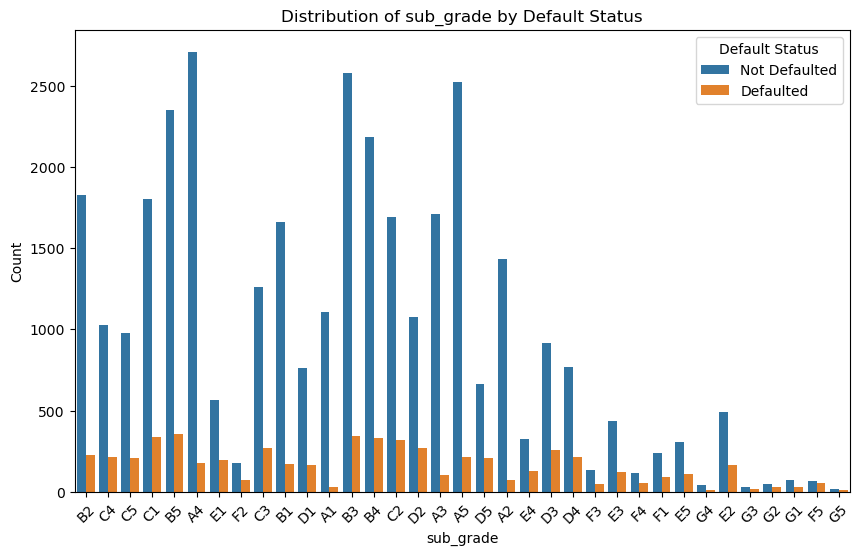

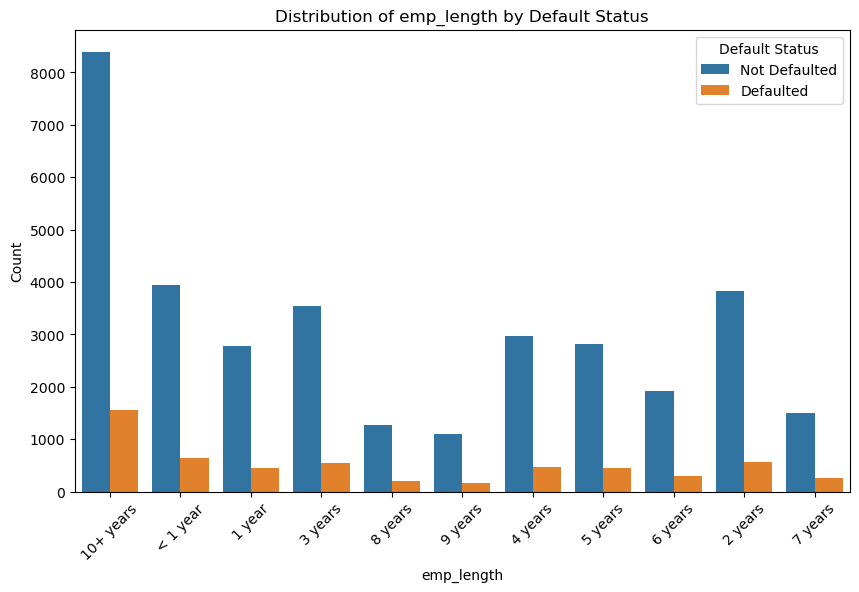

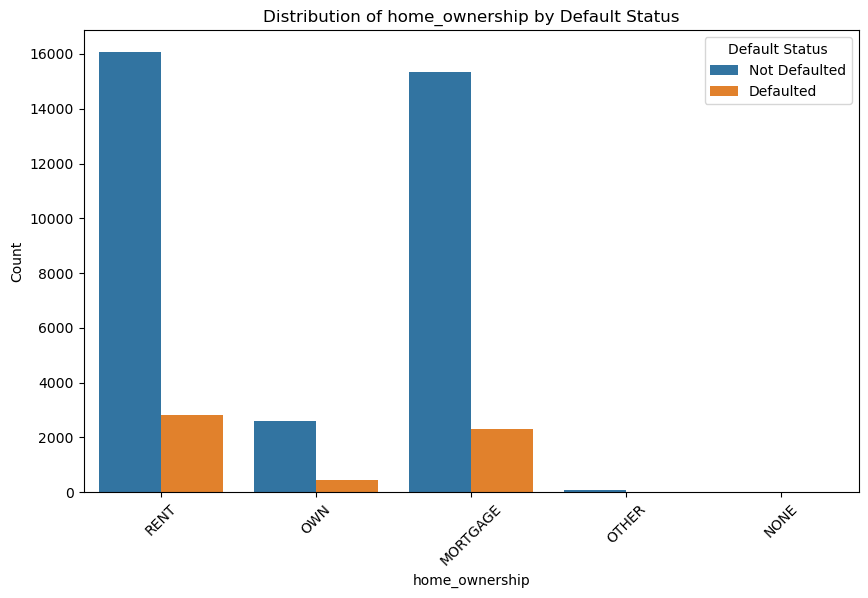

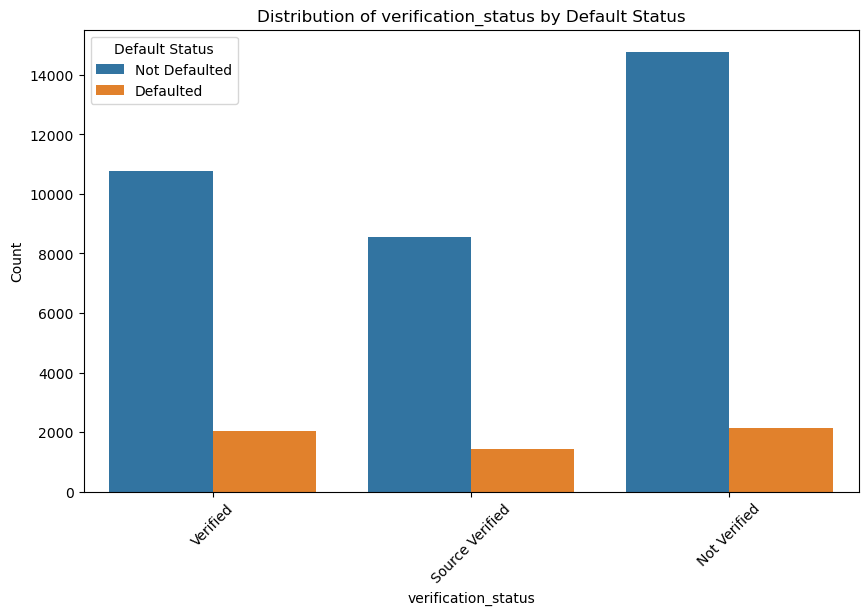

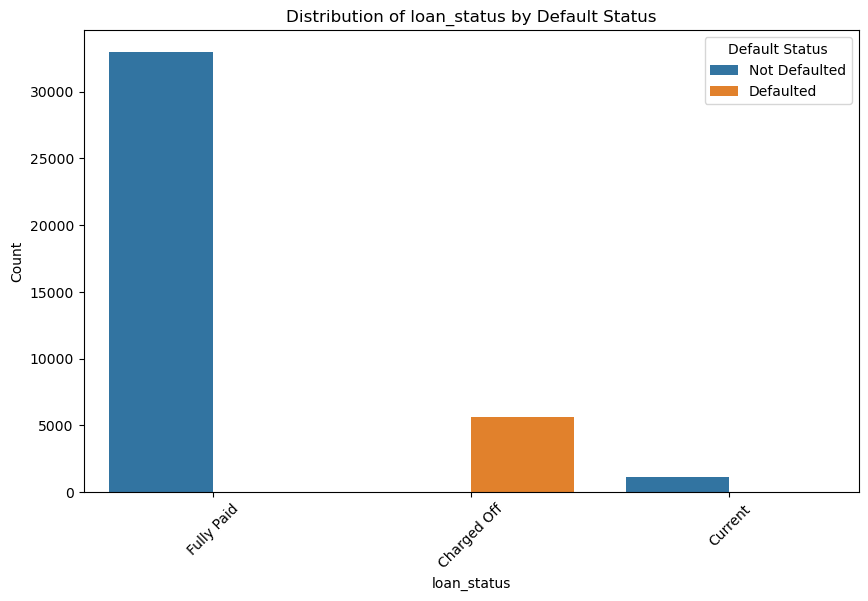

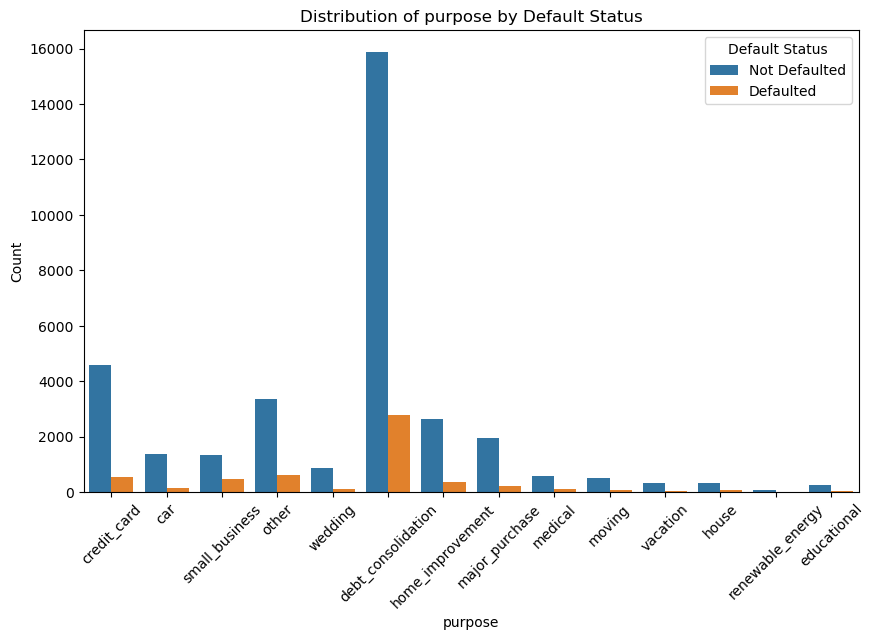

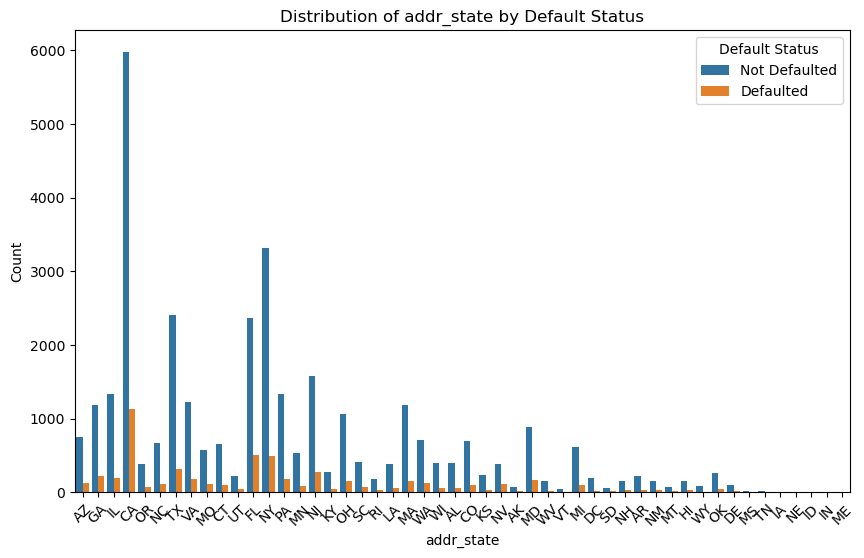

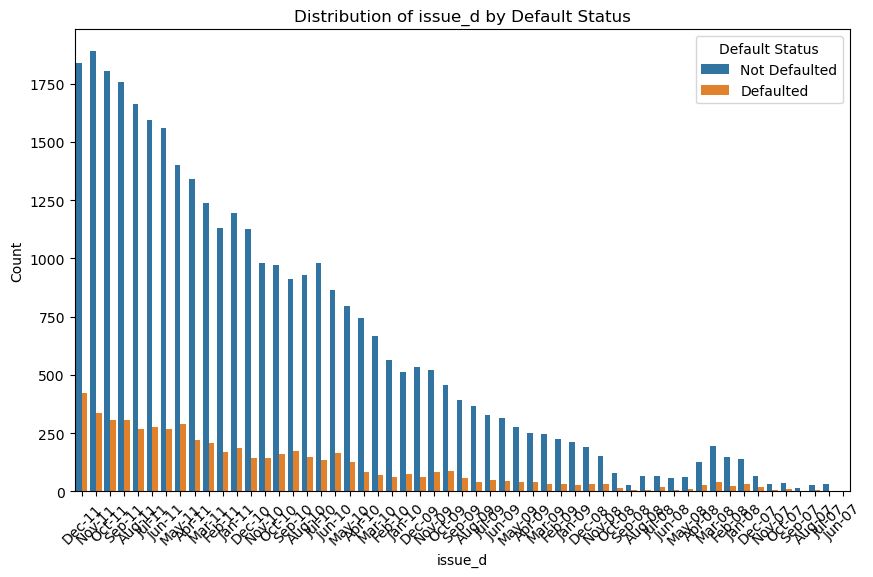

In [30]:
#Countplot for Categorical columns
for i in cat_cols:
    plt.figure(figsize=(10, 6))
    plt.xticks(rotation=45)
    sns.countplot(x=i, hue='charged-off', data=data3)
    plt.title(f'Distribution of {i} by Default Status')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.legend(title='Default Status', labels=['Not Defaulted', 'Defaulted'])
    plt.show()

# Multivariate Analysis

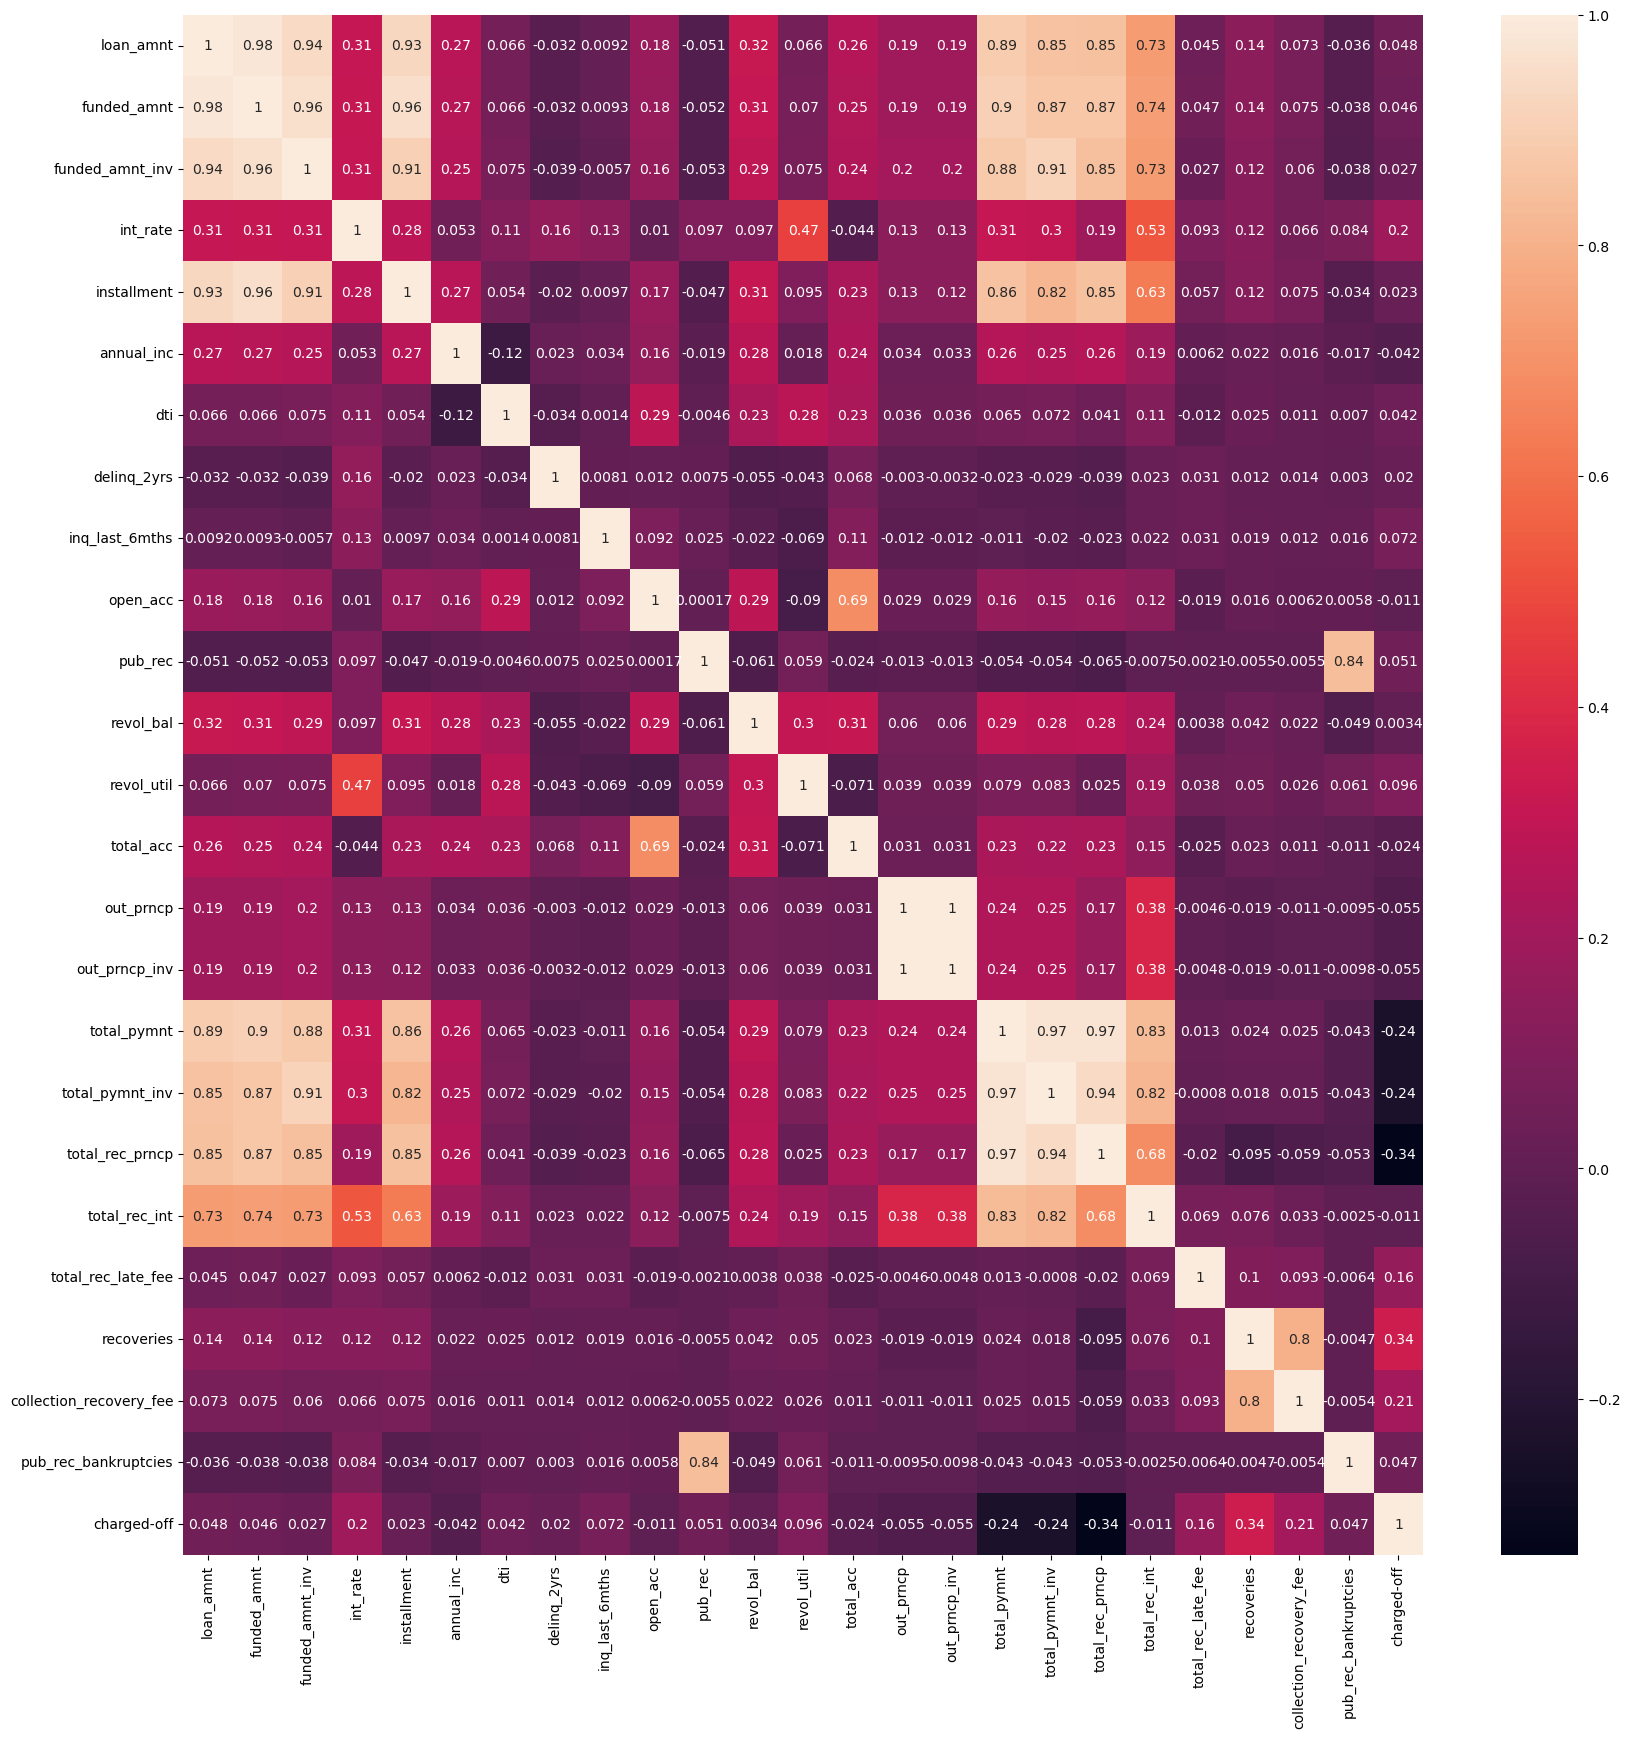

In [31]:
#To find linear correlation between numeric variables
plt.figure(figsize=(20,20))
sns.heatmap(data3.corr(), annot=True)
plt.show()

# Insights

### Strong Indicators:
Debt-to-Income Ratio (DTI): A higher DTI ratio significantly correlates with default risk. Borrowers with a higher percentage of debt relative to their income are more likely to default according to the data.

Revolving Utilization: High credit utilization rates and balances are strongly associated with default. Borrowers who utilize a large portion of their available credit tend to have higher default rates.

Inquiries in Last 6 Months: Credit seeking behavior with frequent recent inquiries is an early indicator of financial distress, potentially leading to defaults.

Interest rates: higher interest rates are more prone to default

### Moderate Indicators:
Installment Size: Though broadly similar across defaulters and non-defaulters, variations in installment sizes at extreme values could have a moderating effect on default likelihood, particularly at very high or low ranges.

Higher funded amount and loan amounts (more than ~17K) are likely to default compared to lower amounts

Annual Income: While the income levels are similar between defaulters and non-defaulters, few data indicates that higher income individual tend to close the loan on time.